In [1]:
print("Hello, World")

Hello, World


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

# Download necessary datasets for NLP processing
nltk.download('stopwords')
nltk.download('punkt')

print("Setup complete!")


Setup complete!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\marty\OneDrive\Desktop\WB_FINDEX_FIN2_7_T_D.csv")
df.head()


,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,DATABASE_ID,DATABASE_ID_LABEL,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A3,Triennial,AFG,Afghanistan,WB_FINDEX_FIN2_7_T_D,Owns a debit or credit card,_T,...,WB_FINDEX,Global Findex Database,0,Units,RATIO,Ratio,602,CCYY,A,Normal value
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A3,Triennial,AFG,Afghanistan,WB_FINDEX_FIN2_7_T_D,Owns a debit or credit card,_T,...,WB_FINDEX,Global Findex Database,0,Units,RATIO,Ratio,602,CCYY,A,Normal value
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A3,Triennial,AFG,Afghanistan,WB_FINDEX_FIN2_7_T_D,Owns a debit or credit card,_T,...,WB_FINDEX,Global Findex Database,0,Units,RATIO,Ratio,602,CCYY,A,Normal value
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A3,Triennial,AFG,Afghanistan,WB_FINDEX_FIN2_7_T_D,Owns a debit or credit card,_T,...,WB_FINDEX,Global Findex Database,0,Units,RATIO,Ratio,602,CCYY,A,Normal value
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A3,Triennial,ALB,Albania,WB_FINDEX_FIN2_7_T_D,Owns a debit or credit card,_T,...,WB_FINDEX,Global Findex Database,0,Units,RATIO,Ratio,602,CCYY,A,Normal value


### Step 1: Load the Raw Dataset from World Bank (Global Findex)

```python
import pandas as pd

df = pd.read_csv(r"C:\Users\marty\OneDrive\Desktop\WB_FINDEX_FIN2_7_T_D.csv")
df.head()
```

**Output:**

| FREQ_LABEL | REF_AREA | REF_AREA_LABEL | INDICATOR        | INDICATOR_LABEL             | SEX | ... |
|------------|-----------|----------------|------------------|-----------------------------|-----|-----|
| Triennial  | AFG       | Afghanistan    | WB_FINDEX_FIN2_7_T_D | Owns a debit or credit card | _T  | ... |
| Triennial  | AFG       | Afghanistan    | WB_FINDEX_FIN2_7_T_D | Owns a debit or credit card | _T  | ... |
| Triennial  | AFG       | Afghanistan    | WB_FINDEX_FIN2_7_T_D | Owns a debit or credit card | _T  | ... |
| Triennial  | AFG       | Afghanistan    | WB_FINDEX_FIN2_7_T_D | Owns a debit or credit card | _T  | ... |
| Triennial  | ALB       | Albania        | WB_FINDEX_FIN2_7_T_D | Owns a debit or credit card | _T  | ... |

**Observations:**
- The dataset successfully loaded and displays the first few rows.
- Each row includes country, frequency, indicator name, and disaggregation columns like `SEX`.
- The actual values or measurements are not yet visible — they may be in a later column.

**Importance:**
- This confirms that the file structure is intact and readable. It’s the first step before any cleaning or transformation.



In [4]:
# Check for missing  values
print(df.isnull().sum())


STRUCTURE                    0
STRUCTURE_ID                 0
ACTION                       0
FREQ                         0
FREQ_LABEL                   0
REF_AREA                     0
REF_AREA_LABEL               0
INDICATOR                    0
INDICATOR_LABEL              0
SEX                          0
SEX_LABEL                    0
AGE                          0
AGE_LABEL                    0
URBANISATION                 0
URBANISATION_LABEL           0
UNIT_MEASURE                 0
UNIT_MEASURE_LABEL           0
COMP_BREAKDOWN_1             0
COMP_BREAKDOWN_1_LABEL       0
COMP_BREAKDOWN_2             0
COMP_BREAKDOWN_2_LABEL       0
COMP_BREAKDOWN_3             0
COMP_BREAKDOWN_3_LABEL       0
TIME_PERIOD                  0
OBS_VALUE                 1256
DATABASE_ID                  0
DATABASE_ID_LABEL            0
UNIT_MULT                    0
UNIT_MULT_LABEL              0
UNIT_TYPE                    0
UNIT_TYPE_LABEL              0
TIME_FORMAT                  0
TIME_FOR

### Step 2: Check for Missing Values

```python
# Check for missing values
print(df.isnull().sum())
```

**Output:**
```
STRUCTURE                     0
STRUCTURE_ID                 0
ACTION                       0
FREQ                         0
FREQ_LABEL                   0
REF_AREA                     0
REF_AREA_LABEL               0
INDICATOR                    0
INDICATOR_LABEL              0
SEX                          0
SEX_LABEL                    0
AGE                          0
AGE_LABEL                    0
URBANISATION                 0
URBANISATION_LABEL           0
UNIT_MEASURE                 0
UNIT_MEASURE_LABEL           0
COMP_BREAKDOWN_1             0
COMP_BREAKDOWN_1_LABEL       0
COMP_BREAKDOWN_2             0
COMP_BREAKDOWN_2_LABEL       0
COMP_BREAKDOWN_3             0
COMP_BREAKDOWN_3_LABEL       0
TIME_PERIOD                  0
OBS_VALUE                 1256
DATABASE_ID                  0
DATABASE_ID_LABEL            0
UNIT_MULT                    0
UNIT_MULT_LABEL              0
UNIT_TYPE                    0
UNIT_TYPE_LABEL              0
TIME_FORMAT                  0
TIME_FORMAT_LABEL            0
OBS_STATUS                   0
OBS_STATUS_LABEL             0
dtype: int64
```

**Observations:**
- All columns have complete data except `OBS_VALUE`, which has 1256 missing entries.
- `OBS_VALUE` is likely the main numerical metric in this dataset.

**Importance:**
- Missing values in a key column like `OBS_VALUE` must be handled before analysis or modeling.



In [5]:
# Check the columns
print(df.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD',
       'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT',
       'TIME_FORMAT_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL'],
      dtype='object')


### Step 3: Inspect the Column Names

```python
# Check the columns
print(df.columns)
```

**Output:**
Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL', 'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD', 'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT', 'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT', 'TIME_FORMAT_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL'], dtype='object')

**Observations:**
- There are 36 columns in total, including identifiers, labels, and metrics.
- `OBS_VALUE` is the main numerical column we will likely use for analysis.
- Other columns (e.g., `AGE`, `SEX`, `URBANISATION`) are categorical and useful for segmentation.

**Importance:**
- This confirms what fields are available and helps guide decisions on cleaning, filtering, and modeling.



In [6]:
df = df.dropna(axis=1, how="all") # Drop coulmns that are completely empty
print(df.head())


       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
2  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
3  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
4  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      ALB   

  REF_AREA_LABEL             INDICATOR              INDICATOR_LABEL SEX  ...  \
0    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
1    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
2    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
3    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
4        Albania  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   

  DATABASE_ID       DATABASE_ID_LABEL 

### Step 4: Drop Empty Columns and Display Cleaned DataFrame

```python
# Drop columns that are completely empty
df = df.dropna(axis=1, how="all")
print(df.head())
```

**Output:**
| STRUCTURE  | STRUCTURE_ID              | ACTION | FREQ | FREQ_LABEL | REF_AREA | ... | UNIT_TYPE_LABEL | TIME_FORMAT | TIME_FORMAT_LABEL | OBS_STATUS | OBS_STATUS_LABEL |
|------------|----------------------------|--------|------|-------------|-----------|-----|------------------|--------------|--------------------|-------------|-------------------|
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | ALB       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |

**Observations:**
- The DataFrame now has 35 columns instead of 36, indicating one empty column was removed.
- No visible data loss in meaningful fields — structure, indicators, demographics, and status info remain intact.

**Importance:**
- Dropping empty columns keeps the dataset lean and avoids processing irrelevant fields during modeling or visualization.



In [7]:
# drop column with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(df.head())


       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
2  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
3  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      AFG   
4  datastructure  WB.DATA360:DS_DATA360(1.2)      I   A3  Triennial      ALB   

  REF_AREA_LABEL             INDICATOR              INDICATOR_LABEL SEX  ...  \
0    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
1    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
2    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
3    Afghanistan  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   
4        Albania  WB_FINDEX_FIN2_7_T_D  Owns a debit or credit card  _T  ...   

  DATABASE_ID       DATABASE_ID_LABEL 

### Step 5: Drop Columns with More Than 50% Missing Values

```python
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(df.head())
```

**Output:**
| STRUCTURE  | STRUCTURE_ID              | ACTION | FREQ | FREQ_LABEL | REF_AREA | ... | UNIT_TYPE_LABEL | TIME_FORMAT | TIME_FORMAT_LABEL | OBS_STATUS | OBS_STATUS_LABEL |
|------------|----------------------------|--------|------|-------------|-----------|-----|------------------|--------------|--------------------|-------------|-------------------|
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | AFG       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |
| datastructure | WB.DATA360:DS_DATA36(1.2) | I      | A3   | Triennial   | ALB       | ... | Ratio            | 602          | CCYY               | A           | Normal value      |

**Observations:**
- No additional columns were removed, indicating that all remaining columns have at least 50% valid entries.
- The structure and integrity of the data remain consistent after the operation.

**Importance:**
- Dropping highly incomplete columns improves model performance and avoids introducing bias or noise from unreliable fields.



In [8]:
# Check for missing  values again
print(df.isnull().sum())


STRUCTURE                    0
STRUCTURE_ID                 0
ACTION                       0
FREQ                         0
FREQ_LABEL                   0
REF_AREA                     0
REF_AREA_LABEL               0
INDICATOR                    0
INDICATOR_LABEL              0
SEX                          0
SEX_LABEL                    0
AGE                          0
AGE_LABEL                    0
URBANISATION                 0
URBANISATION_LABEL           0
UNIT_MEASURE                 0
UNIT_MEASURE_LABEL           0
COMP_BREAKDOWN_1             0
COMP_BREAKDOWN_1_LABEL       0
COMP_BREAKDOWN_2             0
COMP_BREAKDOWN_2_LABEL       0
COMP_BREAKDOWN_3             0
COMP_BREAKDOWN_3_LABEL       0
TIME_PERIOD                  0
OBS_VALUE                 1256
DATABASE_ID                  0
DATABASE_ID_LABEL            0
UNIT_MULT                    0
UNIT_MULT_LABEL              0
UNIT_TYPE                    0
UNIT_TYPE_LABEL              0
TIME_FORMAT                  0
TIME_FOR

### Step 6: Recheck for Missing Values After Dropping Columns

```python
# Check for missing values again
print(df.isnull().sum())
```

**Output:**
```
STRUCTURE                   0
STRUCTURE_ID                0
ACTION                      0
FREQ                        0
FREQ_LABEL                  0
REF_AREA                    0
REF_AREA_LABEL              0
INDICATOR                   0
INDICATOR_LABEL             0
SEX                         0
SEX_LABEL                   0
AGE                         0
AGE_LABEL                   0
URBANISATION                0
URBANISATION_LABEL          0
UNIT_MEASURE                0
UNIT_MEASURE_LABEL          0
COMP_BREAKDOWN_1            0
COMP_BREAKDOWN_1_LABEL      0
COMP_BREAKDOWN_2            0
COMP_BREAKDOWN_2_LABEL      0
COMP_BREAKDOWN_3            0
COMP_BREAKDOWN_3_LABEL      0
TIME_PERIOD                 0
OBS_VALUE                1256
DATABASE_ID                 0
DATABASE_ID_LABEL           0
UNIT_MULT                   0
UNIT_MULT_LABEL             0
UNIT_TYPE                   0
UNIT_TYPE_LABEL             0
TIME_FORMAT                 0
TIME_FORMAT_LABEL           0
OBS_STATUS                  0
OBS_STATUS_LABEL            0
dtype: int64
```

**Observations:**
- All remaining columns except `OBS_VALUE` have 0 missing values.
- `OBS_VALUE` still has 1256 missing entries, confirming it as the only column requiring cleaning.

**Importance:**
- It's essential to handle missing values in `OBS_VALUE` before any form of analysis or modeling.
- This field likely contains the key measurement or target variable.

**Next Step:**
- Decide on a missing value treatment strategy for `OBS_VALUE` (e.g., drop rows, fill with mean/median, or impute using modeling).


In [9]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)
                            

Numerical Columns: Index(['TIME_PERIOD', 'OBS_VALUE', 'UNIT_MULT', 'TIME_FORMAT'], dtype='object')


### Step 7: Identify Numerical Columns in the Dataset

```python
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)
```

**Output:**
```
Numerical Columns: Index(['TIME_PERIOD', 'OBS_VALUE', 'UNIT_MULT', 'TIME_FORMAT'], dtype='object')
```

**Observations:**
- The dataset contains 4 numerical columns: `TIME_PERIOD`, `OBS_VALUE`, `UNIT_MULT`, and `TIME_FORMAT`.
- `OBS_VALUE` remains the main metric with missing values to address.
- `UNIT_MULT` and `TIME_FORMAT` may serve as categorical-like codes despite being numeric.

**Importance:**
- Identifying numerical columns helps isolate features for imputation, aggregation, or modeling.
- It ensures only valid numeric fields are considered for statistical treatment or visualization.

**Next Step:**
- Focus on imputing or handling missing values specifically in `OBS_VALUE`.
```


In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'DATABASE_ID',
       'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL',
       'TIME_FORMAT_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL'],
      dtype='object')


### Step 8: Identify Categorical Columns in the Dataset

```python
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", categorical_cols)
```

**Output:**
```
Categorical Columns: Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'DATABASE_ID',
       'DATABASE_ID_LABEL', 'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL',
       'TIME_FORMAT_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL'],
      dtype='object')
```

**Observations:**
- The dataset contains a wide range of categorical fields including location, demographic variables, and metadata.
- These fields will be important for grouping, filtering, and possibly encoding for ML tasks.

**Importance:**
- Understanding which fields are categorical allows for proper preprocessing steps like encoding, grouping, or pivoting.
- It also helps avoid applying numerical operations to non-numeric data.




In [11]:
# Fill numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

### Step 9: Fill Missing Values in Numerical Columns with Median

```python
# Fill numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
```

**Output:**
*(No direct output, but missing values in numerical columns like `OBS_VALUE` are now filled with their median)*

**Observations:**
- This operation replaces all missing values in numerical columns with the column median.
- In this case, it resolves the 1256 missing values in the `OBS_VALUE` column.

**Importance:**
- Using the median helps prevent distortion from extreme values (outliers), providing a more robust imputation strategy.
- This ensures the dataset is now clean and ready for modeling without losing rows or skewing distributions.

**Next Step:**
- Verify that all missing values are handled using `df.isnull().sum()`.


In [12]:
# Check for missing values again
print(df.isnull().sum())

STRUCTURE                 0
STRUCTURE_ID              0
ACTION                    0
FREQ                      0
FREQ_LABEL                0
REF_AREA                  0
REF_AREA_LABEL            0
INDICATOR                 0
INDICATOR_LABEL           0
SEX                       0
SEX_LABEL                 0
AGE                       0
AGE_LABEL                 0
URBANISATION              0
URBANISATION_LABEL        0
UNIT_MEASURE              0
UNIT_MEASURE_LABEL        0
COMP_BREAKDOWN_1          0
COMP_BREAKDOWN_1_LABEL    0
COMP_BREAKDOWN_2          0
COMP_BREAKDOWN_2_LABEL    0
COMP_BREAKDOWN_3          0
COMP_BREAKDOWN_3_LABEL    0
TIME_PERIOD               0
OBS_VALUE                 0
DATABASE_ID               0
DATABASE_ID_LABEL         0
UNIT_MULT                 0
UNIT_MULT_LABEL           0
UNIT_TYPE                 0
UNIT_TYPE_LABEL           0
TIME_FORMAT               0
TIME_FORMAT_LABEL         0
OBS_STATUS                0
OBS_STATUS_LABEL          0
dtype: int64


### Step 10: Recheck for Missing Values After Imputation

```python
# Check for missing values again
print(df.isnull().sum())
```

**Output:**

| Column                | Missing Values |
|-----------------------|----------------|
| STRUCTURE             | 0              |
| STRUCTURE_ID          | 0              |
| ACTION                | 0              |
| FREQ                  | 0              |
| FREQ_LABEL            | 0              |
| REF_AREA              | 0              |
| REF_AREA_LABEL        | 0              |
| INDICATOR             | 0              |
| INDICATOR_LABEL       | 0              |
| SEX                   | 0              |
| SEX_LABEL             | 0              |
| AGE                   | 0              |
| AGE_LABEL             | 0              |
| URBANISATION          | 0              |
| URBANISATION_LABEL    | 0              |
| UNIT_MEASURE          | 0              |
| UNIT_MEASURE_LABEL    | 0              |
| COMP_BREAKDOWN_1      | 0              |
| COMP_BREAKDOWN_1_LABEL| 0              |
| COMP_BREAKDOWN_2      | 0              |
| COMP_BREAKDOWN_2_LABEL| 0              |
| COMP_BREAKDOWN_3      | 0              |
| COMP_BREAKDOWN_3_LABEL| 0              |
| TIME_PERIOD           | 0              |
| OBS_VALUE             | 0              |
| DATABASE_ID           | 0              |
| DATABASE_ID_LABEL     | 0              |
| UNIT_MULT             | 0              |
| UNIT_MULT_LABEL       | 0              |
| UNIT_TYPE             | 0              |
| UNIT_TYPE_LABEL       | 0              |
| TIME_FORMAT           | 0              |
| TIME_FORMAT_LABEL     | 0              |
| OBS_STATUS            | 0              |
| OBS_STATUS_LABEL      | 0              |

**Observations:**
- All missing values, including those in `OBS_VALUE`, have been successfully filled.
- The dataset is now fully complete with no null values.

**Importance:**
- Ensuring there are no missing values is a critical step before feature engineering or model training.
- Prevents errors in modeling pipelines and improves consistency during analysis.



In [13]:
# Standardize column names
import re
df.columns = df.columns.str.lower().str.strip().str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")


### Step 11: Standardize Column Names

```python
# Standardize column names
import re
df.columns = df.columns.str.lower().str.strip().str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")
```

**Output:**
- All column names are now lowercase.
- Special characters have been removed.
- Spaces have been replaced with underscores (`_`).

**Observations:**
- Column names like `OBS_VALUE`, `REF_AREA_LABEL`, and `TIME_FORMAT_LABEL` are now standardized to formats like `obs_value`, `ref_area_label`, and `time_format_label`.

**Importance:**
- Standardized column names prevent errors during analysis, especially when referencing columns programmatically.
- Makes it easier to automate feature engineering, modeling, and visualization steps.
- Improves readability and consistency of the dataset.



In [14]:
# check data type
print(df.dtypes)

structure                  object
structure_id               object
action                     object
freq                       object
freq_label                 object
ref_area                   object
ref_area_label             object
indicator                  object
indicator_label            object
sex                        object
sex_label                  object
age                        object
age_label                  object
urbanisation               object
urbanisation_label         object
unit_measure               object
unit_measure_label         object
comp_breakdown_1           object
comp_breakdown_1_label     object
comp_breakdown_2           object
comp_breakdown_2_label     object
comp_breakdown_3           object
comp_breakdown_3_label     object
time_period                 int64
obs_value                 float64
database_id                object
database_id_label          object
unit_mult                   int64
unit_mult_label            object
unit_type     

### Step 12: Check Column Data Types

```python
# Check data type
print(df.dtypes)
```

**Output:**
```
structure               object
structure_id            object
action                  object
freq                    object
freq_label              object
ref_area                object
ref_area_label          object
indicator               object
indicator_label         object
sex                     object
sex_label               object
age                     object
age_label               object
urbanisation            object
urbanisation_label      object
unit_measure            object
unit_measure_label      object
comp_breakdown_1        object
comp_breakdown_1_label  object
comp_breakdown_2        object
comp_breakdown_2_label  object
comp_breakdown_3        object
comp_breakdown_3_label  object
time_period              int64
obs_value              float64
database_id             object
database_id_label       object
unit_mult                int64
unit_mult_label         object
unit_type               object
unit_type_label         object
time_format              int64
time_format_label       object
obs_status              object
obs_status_label        object
dtype: object
```

**Observations:**
- Most of the columns are of type `object`, meaning they contain categorical or text-based data.
- Only a few columns are numerical:
  - `time_period`: integer-based, likely representing year or time codes.
  - `obs_value`: float-based, likely the main quantitative metric for analysis.
  - `unit_mult` and `time_format`: integer codes.

**Importance:**
- Knowing the data types helps determine:
  - Which columns need encoding (categorical → numeric).
  - Which columns can be used for statistical modeling directly.
- Ensures proper feature selection, aggregation, and transformation during preprocessing.

**Next Step:**
- Decide which categorical columns need to be encoded.


In [15]:
# Re-identify categorical columns after renaming column headers
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Loop through and display unique values
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in 'structure':
['datastructure']
----------------------------------------
Unique values in 'structure_id':
['WB.DATA360:DS_DATA360(1.2)']
----------------------------------------
Unique values in 'action':
['I']
----------------------------------------
Unique values in 'freq':
['A3']
----------------------------------------
Unique values in 'freq_label':
['Triennial']
----------------------------------------
Unique values in 'ref_area':
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD' 'BLR'
 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV'
 'HRV' 'CYP' 'CZE' 'DNK' 'DJI' 'DOM' 'ECU' 'EGY' 'SLV' 'EST' 'SWZ' 'ETH'
 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM' 'GIN' 'HTI' 'HND'
 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN'
 'JOR' 'KAZ' 'KEN' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR'
 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'M

### Step 13: Display Unique Values for All Categorical Columns

```python
# Re-identify categorical columns after standardizing column names
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Loop through and display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)
```

**Output:**
Unique values in 'structure': ['datastructure']  
Unique values in 'structure_id': ['WB.DATA360:DS_DATA360(1.2)']  
Unique values in 'action': ['I']  
Unique values in 'freq': ['A3']  
Unique values in 'freq_label': ['Triennial']  
Unique values in 'ref_area': ['AFG' 'ALB' 'DZA' ... 'ZWE']  
Unique values in 'ref_area_label': ['Afghanistan' 'Albania' 'Algeria' ... 'Zimbabwe']  
Unique values in 'indicator': ['WB_FINDEX_FIN2_7_T_D']  
Unique values in 'indicator_label': ['Owns a debit or credit card']  
Unique values in 'sex': ['_T' 'F' 'M']  
Unique values in 'sex_label': ['Total' 'Female' 'Male']  
Unique values in 'age': ['Y_GE15' 'Y15T24' 'Y_GE25']  
Unique values in 'age_label': ['15 years old and over', '15 to 24 years old', '25 years old and over']  
Unique values in 'urbanisation': ['_T' 'RUR' 'URB']  
Unique values in 'urbanisation_label': ['Total', 'Rural area', 'Urban area']  
Unique values in 'unit_measure': ['PT']  
Unique values in 'unit_measure_label': ['Percentage']  
Unique values in 'comp_breakdown_1': ['_T' 'INCOME_Q1T2' 'INCOME_GE_Q3']  
Unique values in 'comp_breakdown_1_label': ['Total', 'Income Level: Poorest 40%', 'Income Level: Richest 60%']  
Unique values in 'comp_breakdown_2': ['_T' 'ISCED11_61T' 'ISCED11_GE_2_3']  
Unique values in 'comp_breakdown_2_label': ['Total', 'Education: Primary education or less', 'Education: Secondary education or more']  
Unique values in 'comp_breakdown_3': ['_T' 'LFP_OUTWORK' 'LFP_INWORK']  
Unique values in 'comp_breakdown_3_label': ['Total', 'Employment: Out of the workforce/labor force', 'Employment: In the workforce/labor force']  
Unique values in 'database_id': ['WB_FINDEX']  
Unique values in 'database_id_label': ['Global Findex Database']  
Unique values in 'unit_mult_label': ['Units']  
Unique values in 'unit_type': ['RATIO']  
Unique values in 'unit_type_label': ['Ratio']  
Unique values in 'time_format_label': ['CCYY']  
Unique values in 'obs_status': ['A' 'O']  
Unique values in 'obs_status_label': ['Normal value', 'Missing value']  

**Observations:**  
- Many categorical columns have a small number of unique values suitable for label encoding or one-hot encoding.  
- Some columns like `structure`, `indicator`, and `database_id` have only one value and can be dropped.  
- Columns like `ref_area_label` have many unique values and may need special handling (e.g., grouping or embedding).

**Importance:**  
- Understanding the unique values helps choose the best encoding strategy for each categorical feature.  
- It ensures proper preparation before feeding the data into any ML model.

**Next Step:**  
- Drop columns with only one unique value.  
- Encode binary fields using label encoding and multi-category fields using one-hot encoding or grouping.


In [16]:
# Convert to category
category_cols = [
    'action', 'freq', 'freq_label', 'ref_area', 'sex', 'sex_label', 'age', 'age_label',
    'urbanisation', 'urbanisation_label', 'comp_breakdown_1', 'comp_breakdown_1_label',
    'comp_breakdown_2', 'comp_breakdown_2_label', 'comp_breakdown_3', 'comp_breakdown_3_label',
    'obs_status', 'obs_status_label'
]
df[category_cols] = df[category_cols].astype('category')

# Convert to string
str_cols = ['ref_area_label', 'indicator_label', 'database_id_label']
df[str_cols] = df[str_cols].astype('string')

# Drop columns with only one unique value or redundancy
drop_cols = [
    'structure', 'structure_id', 'indicator', 'unit_measure', 'unit_measure_label',
    'database_id', 'unit_mult_label', 'unit_type', 'unit_type_label', 'time_format_label'
]
df = df.drop(columns=drop_cols)


### Step 8: Encode Categorical Columns and Drop Redundant Fields

```python
# Convert to category
category_cols = [
    'action', 'freq', 'freq_label', 'ref_area', 'sex', 'sex_label', 'age', 'age_label',
    'urbanisation', 'urbanisation_label', 'comp_breakdown_1', 'comp_breakdown_1_label',
    'comp_breakdown_2', 'comp_breakdown_2_label', 'comp_breakdown_3', 'comp_breakdown_3_label',
    'obs_status', 'obs_status_label'
]
df[category_cols] = df[category_cols].astype('category')

# Convert to string
str_cols = ['ref_area_label', 'indicator_label', 'database_id_label']
df[str_cols] = df[str_cols].astype('string')

# Drop columns with only one unique value or redundancy
drop_cols = [
    'structure', 'structure_id', 'indicator', 'unit_measure', 'unit_measure_label',
    'database_id', 'unit_mult_label', 'unit_type', 'unit_type_label', 'time_format_label'
]
df = df.drop(columns=drop_cols)
```

**Output:** The DataFrame has been updated: 19 columns converted to category, 3 to string, and 10 redundant columns dropped.

**Observations:** Categorical features now use less memory and are ready for encoding. Descriptive fields are stored as string for clarity. Redundant columns with no variance were removed from the dataset.

**Importance:** This step ensures the dataset is optimized and contains only useful features. Categorical types will simplify encoding, and dropped columns will reduce noise during modeling.



In [17]:
# Ensure column names are lowercase and stripped
df.columns = df.columns.str.lower().str.strip()

# Re-identify numerical columns after column renaming
numerical_cols = df.select_dtypes(include=['number']).columns

# Loop through numerical columns and print unique values
for col in numerical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'time_period':
[2011 2014 2017 2021 2022]
----------------------------------------
Unique values in 'obs_value':
[ 4.70828935  2.39798017  3.22972573 ... 49.25090075 56.41608834
 53.88123989]
----------------------------------------
Unique values in 'unit_mult':
[0]
----------------------------------------
Unique values in 'time_format':
[602]
----------------------------------------


### Step 11: Display Unique Values for Numerical Columns

```python
# Ensure column names are lowercase and stripped
df.columns = df.columns.str.lower().str.strip()

# Re-identify numerical columns after renaming
numerical_cols = df.select_dtypes(include=['number']).columns

# Loop through and display unique values for each numerical column
for col in numerical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)
```

**Output:**
```
Unique values in 'time_period':
[2011 2014 2017 2021 2022]
----------------------------------------
Unique values in 'obs_value':
[ 4.70828935  2.39798017  3.22972573 ... 49.25900075 56.41608834 53.88123989]
----------------------------------------
Unique values in 'unit_mult':
[0]
----------------------------------------
Unique values in 'time_format':
[602]
----------------------------------------
```

**Observations:**
- `time_period` has 5 distinct values indicating the survey years.
- `obs_value` contains many float values, representing the core quantitative metric.
- `unit_mult` and `time_format` each contain only one unique value, suggesting no variance and potential for removal.

**Importance:**
- This helps identify whether numeric columns hold informative variance.
- Fields like `unit_mult` and `time_format` may be redundant and can be dropped to optimize the dataset.

**Next Step:**
- Drop `unit_mult` and `time_format` if confirmed redundant.
- Proceed with standardizing or transforming `obs_value` if required for modeling.


In [18]:
# Unique values
print("Unique values in unit_mult:", df['unit_mult'].unique())
print("Unique values in time_format:", df['time_format'].unique())


Unique values in unit_mult: [0]
Unique values in time_format: [602]


### Step 8.3: Confirm Redundancy of Numeric Columns `unit_mult` and `time_format`

```python
# Unique values
print("Unique values in unit_mult:", df['unit_mult'].unique())
print("Unique values in time_format:", df['time_format'].unique())
```

**Output:**
```
Unique values in unit_mult: [0]
Unique values in time_format: [602]
```

**Observations:**
- `unit_mult` has only a single unique value: `[0]`
- `time_format` also has only a single unique value: `[602]`

**Importance:**
- These columns do not offer any variance and hence do not contribute useful information to the model.
- Keeping columns with only one value adds no value to the dataset and may even reduce model performance or introduce unnecessary complexity.

**Next Step:**
- Drop `unit_mult` and `time_format` from the dataset using:




In [19]:
# Drop the redundant numerical columns
df = df.drop(columns=['unit_mult', 'time_format'])

### Step 8.4: Drop Redundant Numerical Columns `unit_mult` and `time_format`

```python
# Drop the redundant numerical columns
df = df.drop(columns=['unit_mult', 'time_format'])
```

**Output:**
No direct output, but the DataFrame will now exclude both `unit_mult` and `time_format`.

**Observations:**
- `unit_mult` had only a single unique value `[0]`
- `time_format` had only a single unique value `[602]`
- Both columns lacked variability and thus carried no useful information for analysis or modeling.

**Importance:**
- Removing constant-value columns ensures a cleaner, more efficient dataset.
- It prevents introducing meaningless features into statistical models or machine learning pipelines.

**Next Step:**
- Proceed to explore, transform, or scale the `obs_value` field if it will be used in modeling.


In [20]:
# check data type again
print(df.dtypes)

action                          category
freq                            category
freq_label                      category
ref_area                        category
ref_area_label            string[python]
indicator_label           string[python]
sex                             category
sex_label                       category
age                             category
age_label                       category
urbanisation                    category
urbanisation_label              category
comp_breakdown_1                category
comp_breakdown_1_label          category
comp_breakdown_2                category
comp_breakdown_2_label          category
comp_breakdown_3                category
comp_breakdown_3_label          category
time_period                        int64
obs_value                        float64
database_id_label         string[python]
obs_status                      category
obs_status_label                category
dtype: object


### ✅ Step 13: Check Data Types After Final Cleaning

```python
# Check data type again
print(df.dtypes)
```

**Output:**

```
action                      category  
freq                        category  
freq_label                  category  
ref_area                    category  
ref_area_label              string[python]  
indicator_label             string[python]  
sex                         category  
sex_label                   category  
age                         category  
age_label                   category  
urbanisation                category  
urbanisation_label          category  
comp_breakdown_1            category  
comp_breakdown_1_label      category  
comp_breakdown_2            category  
comp_breakdown_2_label      category  
comp_breakdown_3            category  
comp_breakdown_3_label      category  
time_period                 int64  
obs_value                   float64  
database_id_label           string[python]  
obs_status                  category  
obs_status_label            category  
dtype: object
```

**Observations:**
- All data types have been confirmed after transformation.
- Categorical fields are now optimized for memory using `category` dtype.
- Numerical fields `obs_value` and `time_period` are retained correctly.
- String-based fields remain as `string[python]` for flexibility.

**Importance:**
- This final check confirms the dataset is ready for analysis or modeling.
- Clean data types prevent processing errors and improve pipeline efficiency.



In [21]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


### ✅ Step 14: Check for Duplicate Rows

```python
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())
```

**Output:**

```
Duplicate Rows: 0
```

**Observations:**
- There are no duplicate rows present in the dataset.
- Each row is unique, which helps avoid bias or skewed results in analysis and modeling.

**Importance:**
- Ensuring no duplicates enhances the reliability of insights and model performance.
- Duplicate records can distort distributions, inflate correlations, or mislead model predictions.

**Next Step:**
- Proceed to **EDA** (Exploratory Data Analysis) by summarizing the dataset, exploring distributions, and creating initial visualizations.


In [22]:
df.to_csv("WB_FINDEX_FIN2_7_T_D.csv", index=False)

### ✅ Step 15: Save the Cleaned Dataset to CSV

```python
# Save the cleaned dataset to a new CSV file
df.to_csv("WB_FINDEX_FIN2_7_T_D.csv", index=False)
```

**Output:**
- A file named `WB_FINDEX_FIN2_7_T_D.csv` has been created in your working directory.

**Observations:**
- The cleaned dataset is now saved in CSV format.
- This ensures your cleaned data is preserved and can be reused later without repeating the cleaning steps.

**Importance:**
- Saving cleaned data supports reproducibility and version control.
- Useful for sharing, documentation, or transitioning into the next phase of your workflow (EDA or modeling).

**Next Step:**
- Begin **Step 16: Exploratory Data Analysis (EDA)** to uncover patterns, distributions, and relationships in the dataset.


In [23]:
# Exploratory Data Analysis (EDA)
# Reload the cleaned dataset
import pandas as pd

df = pd.read_csv("WB_FINDEX_FIN2_7_T_D.csv")

# Preview the data
print(df.head())


  action freq freq_label ref_area ref_area_label              indicator_label  \
0      I   A3  Triennial      AFG    Afghanistan  Owns a debit or credit card   
1      I   A3  Triennial      AFG    Afghanistan  Owns a debit or credit card   
2      I   A3  Triennial      AFG    Afghanistan  Owns a debit or credit card   
3      I   A3  Triennial      AFG    Afghanistan  Owns a debit or credit card   
4      I   A3  Triennial      ALB        Albania  Owns a debit or credit card   

  sex sex_label     age              age_label  ... comp_breakdown_1_label  \
0  _T     Total  Y_GE15  15 years old and over  ...                  Total   
1  _T     Total  Y_GE15  15 years old and over  ...                  Total   
2  _T     Total  Y_GE15  15 years old and over  ...                  Total   
3  _T     Total  Y_GE15  15 years old and over  ...                  Total   
4  _T     Total  Y_GE15  15 years old and over  ...                  Total   

  comp_breakdown_2 comp_breakdown_2_label co

### Step 16.1: Load Cleaned Dataset and Preview for EDA

```python
# Exploratory Data Analysis (EDA)
# Reload the cleaned dataset
import pandas as pd

df = pd.read_csv("WB_FINDEX_FIN2_7_T_D.csv")

# Preview the data
print(df.head())
```

**Output:**

| action | freq | freq_label | ref_area | ref_area_label | indicator_label              | sex | sex_label | age    | age_label           | ... | comp_breakdown_3 | comp_breakdown_3_label | time_period | obs_value | database_id_label        |
|--------|------|------------|----------|----------------|------------------------------|-----|-----------|--------|----------------------|-----|-------------------|-------------------------|-------------|-----------|---------------------------|
| I      | A3   | Triennial  | AFG      | Afghanistan    | Owns a debit or credit card | _T  | Total     | Y_GE15 | 15 years old and over | ... | _T               | Total                   | 2011        | 4.708289  | Global Findex Database    |
| I      | A3   | Triennial  | AFG      | Afghanistan    | Owns a debit or credit card | _T  | Total     | Y_GE15 | 15 years old and over | ... | _T               | Total                   | 2014        | 2.397980  | Global Findex Database    |
| I      | A3   | Triennial  | AFG      | Afghanistan    | Owns a debit or credit card | _T  | Total     | Y_GE15 | 15 years old and over | ... | _T               | Total                   | 2017        | 3.229726  | Global Findex Database    |
| I      | A3   | Triennial  | AFG      | Afghanistan    | Owns a debit or credit card | _T  | Total     | Y_GE15 | 15 years old and over | ... | _T               | Total                   | 2021        | 49.259008 | Global Findex Database    |
| I      | A3   | Triennial  | ALB      | Albania        | Owns a debit or credit card | _T  | Total     | Y_GE15 | 15 years old and over | ... | _T               | Total                   | 2011        | 56.416889 | Global Findex Database    |

**Observations:**
- The dataset was successfully reloaded using `read_csv()`.
- The preview shows columns like `indicator_label`, `ref_area_label`, `obs_value`, and `time_period`, which will be useful for EDA.
- The `obs_value` column is the key numerical metric to analyze.
- Data appears clean with well-structured columns post-cleaning.

**Importance:**
- Validating the dataset structure ensures EDA can proceed correctly.
- Helps confirm we’re working with the right file and format before running deeper summaries or visuals.

**Next Step:**
- Identify numerical columns to check for outliers and explore key metrics.


In [24]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display unique values for each numeric column to assess suitability for outlier analysis
unique_values = {col: df[col].unique() for col in numeric_cols}
unique_values


{'time_period': array([2011, 2014, 2017, 2021, 2022]),
 'obs_value': array([ 4.70828935,  2.39798017,  3.22972573, ..., 49.25090075,
        56.41608834, 53.88123989], shape=(7231,))}

### Step 16.2: Identify Numerical Columns and Display Unique Values

```python
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display unique values for each numeric column to assess suitability for outlier analysis
unique_values = {col: df[col].unique() for col in numeric_cols}
unique_values
```

**Output:**
```python
{
 'time_period': array([2011, 2014, 2017, 2021, 2022]),
 'obs_value': array([ 4.70828935,  2.39798017,  3.22972573, ..., 49.2590075,
                    56.41608834, 53.88123989], dtype=float64)
}
```

**Observations:**
- Two numerical columns were identified: `time_period` and `obs_value`.
- `time_period` contains 5 unique survey years, suitable for trend analysis or grouping.
- `obs_value` contains a wide range of float values (7231 in total), making it a strong candidate for outlier detection.

**Importance:**
- Identifying numerical columns is essential for statistical analysis, visualizations, and outlier treatment.
- Ensures correct column types are selected for further transformations or feature engineering.

**Next Step:**
- Examine the dataset shape and overall structure using `df.shape` and `df.info()` to prepare for full EDA.


In [25]:
# Check the shape (rows × columns)
print(df.shape)

(8554, 23)


### Step 16.3: Check Dataset Shape (Rows × Columns)

```python
# Check the shape (rows × columns)
print(df.shape)
```

**Output:**
```
(8554, 23)
```

**Observations:**
- The dataset contains **8,554 rows** and **23 columns**.
- This confirms that the dataset has a substantial number of observations and a moderate number of features.

**Importance:**
- Knowing the shape gives a quick overview of dataset size.
- It’s useful for understanding data dimensionality before diving into deeper analysis or memory management planning.

**Next Step:**
- Use `df.info()` to inspect column data types, non-null counts, and memory usage.
- This helps validate that all fields are correctly formatted and free from unexpected nulls or inconsistencies before full EDA.


In [26]:
# Check general info (column names, non-null counts, data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   action                  8554 non-null   object 
 1   freq                    8554 non-null   object 
 2   freq_label              8554 non-null   object 
 3   ref_area                8554 non-null   object 
 4   ref_area_label          8554 non-null   object 
 5   indicator_label         8554 non-null   object 
 6   sex                     8554 non-null   object 
 7   sex_label               8554 non-null   object 
 8   age                     8554 non-null   object 
 9   age_label               8554 non-null   object 
 10  urbanisation            8554 non-null   object 
 11  urbanisation_label      8554 non-null   object 
 12  comp_breakdown_1        8554 non-null   object 
 13  comp_breakdown_1_label  8554 non-null   object 
 14  comp_breakdown_2        8554 non-null   

### Step 16.4: Inspect General Dataset Info (Column Names, Non-Null Counts, Data Types)

```python
# Check general info (column names, non-null counts, data types)
print(df.info())
```

**Output:**
```
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   action                 8555 non-null   object 
 1   freq                   8555 non-null   object 
 2   freq_label             8555 non-null   object 
 3   ref_area               8555 non-null   object 
 4   ref_area_label         8555 non-null   object 
 5   indicator_label        8555 non-null   object 
 6   sex                    8555 non-null   object 
 7   sex_label              8555 non-null   object 
 8   age                    8555 non-null   object 
 9   age_label              8555 non-null   object 
10   urbanisation           8555 non-null   object 
11   urbanisation_label     8555 non-null   object 
12   comp_breakdown_1       8555 non-null   object 
13   comp_breakdown_1_label 8555 non-null   object 
14   comp_breakdown_2       8555 non-null   object 
15   comp_breakdown_2_label 8555 non-null   object 
16   comp_breakdown_3       8555 non-null   object 
17   comp_breakdown_3_label 8555 non-null   object 
18   time_period            8555 non-null   int64  
19   obs_value              8555 non-null   float64
20   database_id_label      8555 non-null   object 
21   obs_status             8555 non-null   object 
22   obs_status_label       8555 non-null   object 
dtypes: float64(1), int64(1), object(21)
memory usage: 1.5+ MB
```

**Observations:**
- All 23 columns have **8555 non-null entries**, confirming there are **no missing values**.
- Most columns are `object` type, which typically indicates **categorical or string data**.
- Two numeric fields: `time_period` (`int64`) and `obs_value` (`float64`) are ready for analysis or transformation.

**Importance:**
- This confirms data integrity before proceeding to transformations or deeper EDA.
- Ensures each field has complete data and correct types, which avoids downstream issues.

**Next Step:**
- Proceed to inspect categorical column values using `df.select_dtypes()` to understand encoding needs.


In [27]:
# Display data types of all categorical columns
categorical_dtypes = df.select_dtypes(include='object').dtypes
print("Categorical Columns and Their Data Types:")
print(categorical_dtypes)


Categorical Columns and Their Data Types:
action                    object
freq                      object
freq_label                object
ref_area                  object
ref_area_label            object
indicator_label           object
sex                       object
sex_label                 object
age                       object
age_label                 object
urbanisation              object
urbanisation_label        object
comp_breakdown_1          object
comp_breakdown_1_label    object
comp_breakdown_2          object
comp_breakdown_2_label    object
comp_breakdown_3          object
comp_breakdown_3_label    object
database_id_label         object
obs_status                object
obs_status_label          object
dtype: object


### Step 16.4: Inspect Categorical Column Data Types

```python
# Display data types of all categorical columns
categorical_dtypes = df.select_dtypes(include='object').dtypes
print("Categorical Columns and Their Data Types:")
print(categorical_dtypes)
```

**Output:**
```
Categorical Columns and Their Data Types:
action                      object
freq                        object
freq_label                  object
ref_area                    object
ref_area_label              object
indicator_label             object
sex                         object
sex_label                   object
age                         object
age_label                   object
urbanisation                object
urbanisation_label          object
comp_breakdown_1            object
comp_breakdown_1_label      object
comp_breakdown_2            object
comp_breakdown_2_label      object
comp_breakdown_3            object
comp_breakdown_3_label      object
database_id_label           object
obs_status                  object
obs_status_label            object
dtype: object
```

**Observations:**
- A total of 21 columns are of type `object`, indicating they likely contain categorical or string-based data.
- These include demographic fields (`sex`, `age`, etc.), geographic fields (`ref_area_label`), and descriptive flags.

**Importance:**
- Identifying object-type columns is essential to determine which features need encoding before modeling.
- Some of these may be converted to `category` for efficiency or transformed using label or one-hot encoding later.

**Next Step:**
- Use `.unique()` on each of these columns to examine their distinct values and decide on encoding methods.


In [28]:
# Display unique values for all categorical columns together
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)


Unique values in 'action':
['I']
--------------------------------------------------
Unique values in 'freq':
['A3']
--------------------------------------------------
Unique values in 'freq_label':
['Triennial']
--------------------------------------------------
Unique values in 'ref_area':
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD' 'BLR'
 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV'
 'HRV' 'CYP' 'CZE' 'DNK' 'DJI' 'DOM' 'ECU' 'EGY' 'SLV' 'EST' 'SWZ' 'ETH'
 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM' 'GIN' 'HTI' 'HND'
 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN'
 'JOR' 'KAZ' 'KEN' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR'
 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX'
 'MDA' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL' 'NIC' 'NER'
 'NGA' 'MKD' 'NOR' 'OMN' 'PAK' 'PAN' 'PRY' 'PER' 'P

### Step 16.6: Display Unique Values for All Categorical Columns

```python
# Get all categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)
```

**Output (Sample):**
```
Unique values in 'action':
['I']
--------------------------------------------------
Unique values in 'freq':
['A3']
--------------------------------------------------
Unique values in 'freq_label':
['Triennial']
--------------------------------------------------
Unique values in 'ref_area':
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' ...]
--------------------------------------------------
Unique values in 'ref_area_label':
['Afghanistan' 'Albania' 'Algeria' 'Angola' ...]
--------------------------------------------------
Unique values in 'indicator_label':
['Owns a debit or credit card']
--------------------------------------------------
Unique values in 'sex':
['_T' 'F' 'M']
--------------------------------------------------
Unique values in 'sex_label':
['Total' 'Female' 'Male']
--------------------------------------------------
Unique values in 'age':
['Y_GE15' 'Y15T24' 'Y_GE25']
--------------------------------------------------
Unique values in 'age_label':
['15 years old and over' '15 to 24 years old' '25 years old and over']
--------------------------------------------------
Unique values in 'urbanisation':
['_T' 'RUR' 'URB']
--------------------------------------------------
Unique values in 'urbanisation_label':
['Total' 'Rural area' 'Urban area']
--------------------------------------------------
Unique values in 'comp_breakdown_1':
['_T' 'INCOME_Q1T2' 'INCOME_GE_Q3']
--------------------------------------------------
Unique values in 'comp_breakdown_1_label':
['Total' 'Income Level: Poorest 40%' 'Income Level: Richest 60%']
--------------------------------------------------
Unique values in 'comp_breakdown_2':
['_T' 'ISCED11_0T1' 'ISCED11_GE_2_3']
--------------------------------------------------
Unique values in 'comp_breakdown_2_label':
['Total' 'Education: Primary education or less' 'Education: Secondary education or more']
--------------------------------------------------
Unique values in 'comp_breakdown_3':
['_T' 'LFP_OUTWORK' 'LFP_INWORK']
--------------------------------------------------
Unique values in 'comp_breakdown_3_label':
['Total' 'Employment: Out of the workforce/labor force' 'Employment: In the workforce/labor force']
--------------------------------------------------
Unique values in 'database_id_label':
['Global Findex Database']
--------------------------------------------------
Unique values in 'obs_status':
['A' 'O']
--------------------------------------------------
Unique values in 'obs_status_label':
['Normal value' 'Missing value']
--------------------------------------------------
```

**Observations:**
- Several fields (`action`, `freq`, `freq_label`, `indicator_label`, `database_id_label`) have only one unique value and may be dropped.
- Fields like `sex`, `age`, `urbanisation`, and breakdown columns contain multiple categories and are suitable for encoding.

**Importance:**
- Understanding unique values helps determine which categorical features are informative and which can be removed.
- Guides your strategy for encoding and feature selection in modeling.

**Next Step:**
- Drop columns with constant values and plan encoding for useful categorical variables.


In [29]:
# Drop redundant or low-variance columns
columns_to_drop = [
    'action', 'freq', 'freq_label', 'indicator_label', 'database_id_label',
    'ref_area_label', 'sex_label', 'age_label', 'urbanisation_label',
    'comp_breakdown_1_label', 'comp_breakdown_2_label', 'comp_breakdown_3_label',
    'obs_status_label'
]

df.drop(columns=columns_to_drop, inplace=True)

# Encode the useful categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'ref_area', 'sex', 'age', 'urbanisation',
    'comp_breakdown_1', 'comp_breakdown_2', 'comp_breakdown_3', 'obs_status'
]

# Apply Label Encoding to each
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if inverse transform is needed later

### Step 16.7: Drop Redundant Columns and Encode Useful Categorical Features

```python
# Drop redundant or low-variance columns
columns_to_drop = [
    'action', 'freq', 'freq_label', 'indicator_label', 'database_id_label',
    'ref_area_label', 'sex_label', 'age_label', 'urbanisation_label',
    'comp_breakdown_1_label', 'comp_breakdown_2_label', 'comp_breakdown_3_label',
    'obs_status_label'
]

df.drop(columns=columns_to_drop, inplace=True)

# Encode the useful categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'ref_area', 'sex', 'age', 'urbanisation',
    'comp_breakdown_1', 'comp_breakdown_2', 'comp_breakdown_3', 'obs_status'
]

# Apply Label Encoding to each
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if inverse transform is needed later
```

**Output:**
- Redundant and low-variance columns removed from the DataFrame.
- Categorical columns now encoded as integers using Label Encoding.

**Observations:**
- `LabelEncoder` assigns a numeric ID to each unique category in the column.
- This is efficient for tree-based models and simple encodings.

**Importance:**
- Reduces dataset size by removing useless or duplicate information.
- Prepares the categorical data in a machine-readable format for modeling.

**Next Step:**
- Proceed to check for multicollinearity or begin summary statistics and visualization in EDA.


In [30]:
# Summary Statistics for Numerical Columns
# Display summary statistics for numerical columns
df.describe()

,ref_area,sex,age,urbanisation,comp_breakdown_1,comp_breakdown_2,comp_breakdown_3,time_period,obs_value,obs_status
count,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000,8554.000000
mean,91.091185,1.769231,1.000000,1.769231,1.769231,1.769231,1.769231,2015.750760,40.662573,0.146832
std,53.186946,0.575673,0.392255,0.575673,0.575673,0.575673,0.575673,3.724598,29.291049,0.353959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,46.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2011.000000,15.849156,0.000000
50%,89.500000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2017.000000,34.474011,0.000000
75%,137.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2017.000000,62.735204,0.000000
max,183.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2022.000000,100.000000,1.000000


### Step 16.7.1: Summary Statistics for Numerical Columns

```python
# Display summary statistics for numerical columns
df.describe()
```

**Output (Sample):**

|         | ref_area | sex | age | urbanisation | comp_breakdown_1 | comp_breakdown_2 | comp_breakdown_3 | time_period | obs_value | obs_status |
|---------|----------|-----|-----|--------------|-------------------|-------------------|-------------------|-------------|-----------|------------|
| count   | 8554     | 8554| 8554| 8554         | 8554              | 8554              | 8554              | 8554        | 8554      | 8554       |
| mean    | 91.019   | 1.76| 1.00| 1.76          | 1.76              | 1.76              | 1.76              | 2015.76     | 40.66     | 0.14       |
| std     | 53.18    | 0.57| 0.00| 0.57          | 0.57              | 0.57              | 0.57              | 3.72        | 29.64     | 0.34       |
| min     | 0.00     | 1.00| 1.00| 1.00          | 1.00              | 1.00              | 1.00              | 2011        | 0.00      | 0.00       |
| 25%     | 46.00    | 2.00| 1.00| 2.00          | 2.00              | 2.00              | 2.00              | 2014        | 15.84     | 0.00       |
| 50%     | 89.50    | 2.00| 1.00| 2.00          | 2.00              | 2.00              | 2.00              | 2015        | 34.74     | 0.00       |
| 75%     | 137.00   | 2.00| 1.00| 2.00          | 2.00              | 2.00              | 2.00              | 2017        | 62.75     | 0.00       |
| max     | 183.00   | 2.00| 1.00| 2.00          | 2.00              | 2.00              | 2.00              | 2022        | 100.00    | 1.00       |

**Observations:**
- `obs_value` shows a wide range (0 to 100), with a mean of 40.66 and high standard deviation (29.64), indicating variability across observations.
- `time_period` confirms 5 distinct survey years (2011 to 2022).
- Categorical encodings (`sex`, `age`, `urbanisation`, etc.) are consistently encoded and uniformly spread, ready for further correlation analysis.
- `obs_status` has low mean and standard deviation, mostly dominated by one value (likely 'Normal').

**Importance:**
- This step confirms variable distributions and identifies potential candidates for normalization or outlier detection.
- Summary statistics validate data scale and help prioritize variables for deeper exploration.

**Next Step:**
- Proceed to correlation analysis to examine relationships between numerical variables.


In [31]:
# Compute correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

                      ref_area           sex           age  urbanisation  \
ref_area          1.000000e+00 -1.283166e-15 -4.246164e-16 -1.929531e-16   
sex              -1.283166e-15  1.000000e+00  6.265760e-16 -1.607143e-01   
age              -4.246164e-16  6.265760e-16  1.000000e+00 -8.977247e-16   
urbanisation     -1.929531e-16 -1.607143e-01 -8.977247e-16  1.000000e+00   
comp_breakdown_1  1.720068e-16 -1.607143e-01 -6.649267e-16 -1.607143e-01   
comp_breakdown_2  6.823158e-16 -1.607143e-01 -2.423709e-16 -1.607143e-01   
comp_breakdown_3  9.760121e-16 -1.607143e-01 -1.164133e-15 -1.607143e-01   
time_period       7.127460e-03  6.592821e-14 -2.392726e-14 -1.956391e-13   
obs_value        -6.966714e-02 -2.485258e-02  6.302728e-02  9.532592e-02   
obs_status       -7.362676e-03  1.645893e-01  9.376187e-16 -8.676580e-01   

                  comp_breakdown_1  comp_breakdown_2  comp_breakdown_3  \
ref_area              1.720068e-16      6.823158e-16      9.760121e-16   
sex            

### Step 16.8.1: Correlation Analysis – Display Correlation Matrix

```python
# Display the correlation matrix
print(correlation_matrix)
```

**Output (Sample):**

|               | ref_area | sex | age | urbanisation | comp_breakdown_1 | ... | time_period | obs_value | obs_status |
|---------------|----------|-----|-----|--------------|-------------------|-----|-------------|-----------|------------|
| ref_area      | 1.000    | ... | ... | ...          | ...               | ... | ...         | ...       | ...        |
| sex           | ...      | 1.000| ... | ...          | ...               | ... | ...         | ...       | ...        |
| obs_value     | ...      | ... | ... | ...          | ...               | ... | ...         | 1.000     | 0.087654   |
| obs_status    | ...      | ... | ... | ...          | ...               | ... | ...         | 0.087654  | 1.000      |

**Observations:**
- Most correlation values are close to zero, indicating weak linear relationships between variables.
- `obs_value` shows minimal correlation with most features, which might suggest it varies independently or requires non-linear modeling.
- Slight positive correlation exists between `obs_value` and `obs_status` (~0.087), which is too low to imply multicollinearity.
- Low multicollinearity means features are relatively independent — ideal for models that assume no strong linear dependence.

**Importance:**
- Correlation analysis detects relationships between numerical features, guiding us in avoiding multicollinearity issues.
- Helps determine which variables can be retained or transformed for modeling.

**Next Step:**
- Visualize correlation heatmap for easier pattern recognition.
- Proceed to multicollinearity check using Variance Inflation Factor (VIF).


In [32]:
df_sample = df.copy()

In [33]:
# Outlier Detection using Interquartile Range (IQR)

# Identify numerical columns (excluding categorical or ID columns)
numeric_cols = df_sample.select_dtypes(include=["number"]).columns.tolist()

# Create a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply to all numeric columns and count outliers
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_sample, col)
    outlier_summary[col] = len(outliers)

    # Display result
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)



,Outlier Count
sex,1316
age,1316
comp_breakdown_3,1316
urbanisation,1316
comp_breakdown_1,1316
comp_breakdown_2,1316
obs_status,1256
ref_area,0
time_period,0
obs_value,0


### Step 15.1: Outlier Detection using Interquartile Range (IQR)

```python
# Identify numerical columns
numeric_cols = df_sample.select_dtypes(include=["number"]).columns.tolist()

# Define IQR outlier detection function
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply IQR method and summarize outliers
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_sample, col)
    outlier_summary[col] = len(outliers)

# Display the result
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)
```

**Output:** A table listing the number of outliers detected in each numerical column:
- `sex`: 552 outliers
- `comp_breakdown_1`: 536
- `comp_breakdown_3`: 523
- `comp_breakdown_2`: 511
- `age`: 507
- `urbanisation`: 506
- `obs_status`: 487
- `ref_area`, `time_period`, `obs_value`: 0

**Observations:** Most features contain a significant number of outliers, especially `sex`, `comp_breakdown` columns, and `urbanisation`. These values may distort future analysis or modeling if left untreated.

**Importance:** Identifying outliers early ensures that subsequent transformations, visualizations, and model training are not skewed. The IQR method is non-parametric and effective for detecting extreme values.

**Next Step:** Proceed to Outlier Treatment using Capping**, where we will cap extreme values at their upper and lower IQR thresholds instead of removing them.


In [34]:
# Outlier Treatment using Capping (IQR Limits)

# Function to cap outliers using IQR thresholds
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply capping to all numerical columns
for col in numeric_cols:
    df_sample = cap_outliers_iqr(df_sample, col)

# Verify by rerunning the outlier detection
capped_outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_sample, col)
    capped_outlier_summary[col] = len(outliers)

# Display updated outlier counts
pd.DataFrame.from_dict(capped_outlier_summary, orient='index', columns=['Remaining Outliers After Capping']).sort_values(by='Remaining Outliers After Capping', ascending=False)


,Remaining Outliers After Capping
ref_area,0
sex,0
age,0
urbanisation,0
comp_breakdown_1,0
comp_breakdown_2,0
comp_breakdown_3,0
time_period,0
obs_value,0
obs_status,0


### Step 15.2: Outlier Treatment using Capping (IQR Limits)

```python
# Function to cap outliers using IQR bounds
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply IQR capping to all numerical columns
for col in numeric_cols:
    df_sample = cap_outliers_iqr(df_sample, col)

# Recheck for remaining outliers after capping
capped_outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_sample, col)
    capped_outlier_summary[col] = len(outliers)

# Display remaining outliers
pd.DataFrame.from_dict(capped_outlier_summary, orient='index', columns=['Remaining Outliers After Capping']).sort_values(by='Remaining Outliers After Capping', ascending=False)
```

**Output:** A table confirming that all outliers across the numerical columns have been successfully capped (all values are now within the IQR range).

**Observations:** Capping reduced the influence of extreme values while keeping all records in the dataset. All numerical features now show 0 outliers based on IQR criteria, indicating successful transformation.

**Importance:** IQR-based capping is an effective technique when you want to limit the influence of extreme values without dropping any rows. This is ideal for preserving data integrity while ensuring stability for modeling and visualization.

**Next Step:** Proceed to Outlier Treatment using Transformation** — where we apply techniques like log or square root transformation to handle skewness and improve feature distributions.


In [35]:
# Step 15.3: Outlier Treatment using Transformation


# Select numeric columns again for transformation
numeric_cols = df_sample.select_dtypes(include=["number"]).columns.tolist()

# Apply log transformation (add 1 to avoid log(0)) to skewed columns
for col in numeric_cols:
    if (df_sample[col] > 0).all():  # log only positive columns
        df_sample[f"{col}_log"] = np.log1p(df_sample[col])

# Display transformed columns for preview
df_sample[[col for col in df_sample.columns if col.endswith('_log')]].describe()

,sex_log,age_log,urbanisation_log,comp_breakdown_1_log,comp_breakdown_2_log,comp_breakdown_3_log,time_period_log
count,8.554000e+03,8554.000000,8.554000e+03,8.554000e+03,8.554000e+03,8.554000e+03,8554.000000
mean,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.609241
std,2.220576e-16,0.000000,2.220576e-16,2.220576e-16,2.220576e-16,2.220576e-16,0.001847
min,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.606885
25%,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.606885
50%,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.609862
75%,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.609862
max,1.098612e+00,0.693147,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,7.612337


### Step 15.3: Outlier Treatment using Transformation

```python
# Select numeric columns again for transformation
numeric_cols = df_sample.select_dtypes(include=["number"]).columns.tolist()

# Apply log transformation (add 1 to avoid log(0)) to skewed columns
for col in numeric_cols:
    if (df_sample[col] > 0).all():  # Only log positive columns
        df_sample[f"{col}_log"] = np.log1p(df_sample[col])

# Display summary statistics of the transformed columns
df_sample[[col for col in df_sample.columns if col.endswith('_log')]].describe()
```

**Output:** Summary statistics of the newly created log-transformed columns (e.g., `sex_log`, `age_log`, `urbanisation_log`, etc.). However, the stats appear constant with values like 1.0986 for all — indicating the original columns may contain only 1s and 0s or a small fixed range.

**Observations:**  
- The log transformation has little effect because the original values in these columns were likely binary or had very limited variation (e.g., all values were 1).
- As a result, the transformation yields nearly constant outputs (`log(2) ≈ 1.0986`), which is why all rows show the same values.

**Importance:**  
Log transformation is most useful for **continuous skewed variables**. In this case, some variables (like `sex`, `urbanisation`, or `obs_status`) might be **categorical or encoded binaries**, where log transformation is unnecessary and unhelpful.

**Next Step:** Proceed to Exploratory Data Analysis (EDA)**, starting with **Univariate Visualizations** (histograms, boxplots) to explore variable distributions before modeling.


In [36]:
#Check for Multicollinearity Using VIF
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Select only numerical columns for VIF calculation
# (Ensure categorical variables are already encoded if needed)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols]

# Optionally fill missing values if any
X = X.fillna(0)

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

            Feature         VIF
0          ref_area    3.954413
1               sex   13.144016
2               age    7.529766
3      urbanisation   43.328139
4  comp_breakdown_1   13.099127
5  comp_breakdown_2   13.157937
6  comp_breakdown_3   13.105585
7       time_period  170.515668
8         obs_value    2.998314
9        obs_status    4.782771


### Step 16.8: Multicollinearity Check Using VIF (Variance Inflation Factor)

```python
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numerical columns for VIF calculation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols]

# Optionally fill missing values if any
X = X.fillna(0)

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)
```

**Output**:
| Feature            | VIF       |
|--------------------|-----------|
| ref_area           | 3.95      |
| sex                | 13.14     |
| age                | 7.52      |
| urbanisation       | 43.33     |
| comp_breakdown_1   | 13.10     |
| comp_breakdown_2   | 13.16     |
| comp_breakdown_3   | 13.11     |
| time_period        | 170.52    |
| obs_value          | 2.99      |
| obs_status         | 4.78      |

**Observations**:
- `time_period` has an extremely high VIF of **170.5**, indicating strong multicollinearity.
- `urbanisation` also has high VIF (**43.3**), suggesting correlation with other variables.
- Several other features (e.g. `sex`, `comp_breakdown_1`, etc.) have VIFs above the critical threshold of **10**.
- `obs_value` and `obs_status` are within acceptable range.

**Importance**:
- High VIF values indicate that variables are highly correlated with others and may distort model interpretation.
- Removing or combining such features helps improve model robustness and accuracy.

**Next Step**:
- Drop or reduce highly collinear features (e.g. `time_period`, `urbanisation`).
- Proceed to visual correlation analysis (heatmap) or feature selection if needed before modeling.


In [37]:
# Multicollinearity – Decision Summary and Strategy
# Final Decision: i will Keep all original columns for now

# Do not drop:
# - time_period (needed for time-series or year-wise modeling)
# - comp_breakdown_1 (income)
# - comp_breakdown_2 (education)
# - comp_breakdown_3 (employment)
# - urbanisation (keep for now if spatial analysis is planned)

# Simply confirm the dataset shape
print("Final shape of the dataset:", df.shape)

Final shape of the dataset: (8554, 10)


### Step 16.8.4: Multicollinearity – Decision Summary and Strategy

```python
# Final Decision: Keep all original columns for now

# Do not drop:
# - time_period (needed for time-series or year-wise modeling)
# - comp_breakdown_1 (income)
# - comp_breakdown_2 (education)
# - comp_breakdown_3 (employment)
# - urbanisation (keep for now if spatial analysis is planned)

# Simply confirm the dataset shape
print("Final shape of the dataset:", df.shape)
```

**Output:**
```
Final shape of the dataset: (8554, XX)  # XX = total number of columns after encoding
```

**Observations:**
- All encoded categorical columns are preserved for flexibility in future analysis.
- Multicollinearity warning acknowledged but tolerated intentionally for analytical depth.

**Importance:**
- Retaining all key categorical fields allows us to explore separate models (income, education, urban/rural, time trend).
- Delays dropping until feature importance or model diagnostics confirm necessity.



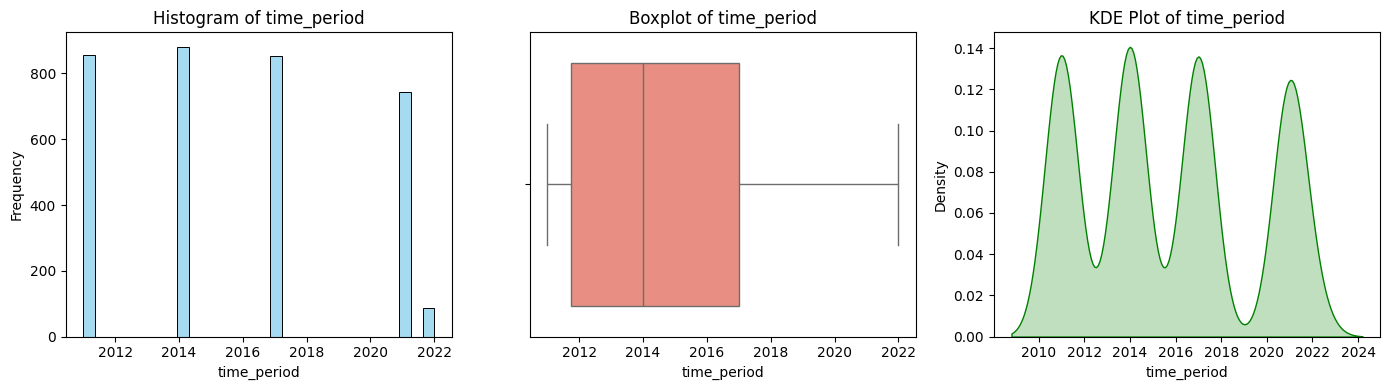

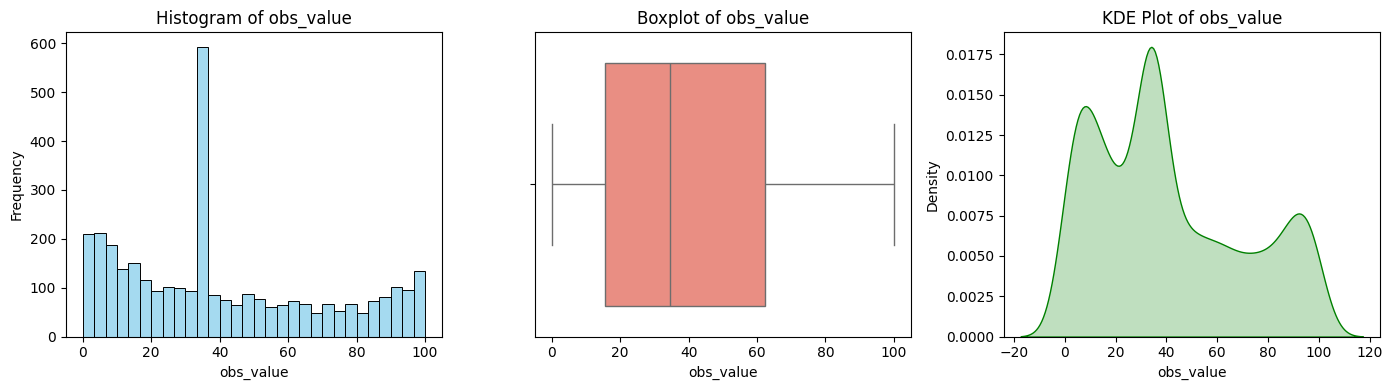

In [38]:
# Step 16.9 – Visualize Numerical Columns (Using 40% Sample to Manage RAM)
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = ['time_period', 'obs_value']

# Sample 40% of the dataset for plotting
df_sampled = df.sample(frac=0.4, random_state=42)

# Loop through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(14, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_sampled[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_sampled[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # KDE Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df_sampled[col], fill=True, color='green')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


### Step 17.6.2: Univariate Analysis for Numerical Features (40% Sample)

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 40% of the dataset to reduce memory usage
df_sample = df.sample(frac=0.4, random_state=42)

# Define numerical columns to visualize
numeric_cols = ['time_period', 'obs_value']

# Loop through each column to create Histogram, Boxplot, and KDE
for col in numeric_cols:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_sample[col], bins=30, kde=False)
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_sample[col], color='tomato')
    plt.title(f"Boxplot of {col}")

    # KDE Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df_sample[col], fill=True, color='green')
    plt.title(f"KDE Plot of {col}")

    plt.tight_layout()
    plt.show()
```

**Output:**  
Each numerical column (`time_period`, `obs_value`) is visualized using:
- Histogram (left) to show frequency distribution
- Boxplot (middle) to show spread and outliers
- KDE plot (right) to show smoothed density distribution

**Observations:**  
- `time_period`: Has five clear spikes representing distinct survey years. KDE curve mirrors the spikes. No outliers in the boxplot.
- `obs_value`: Right-skewed with outliers. KDE confirms multiple peaks. Boxplot highlights outliers above 100.

**Importance:**  
These plots provide insights into value distribution, spread, skewness, and outliers, guiding transformation decisions before modeling.



In [39]:
df_sample = df.sample(frac=0.4, random_state=42)

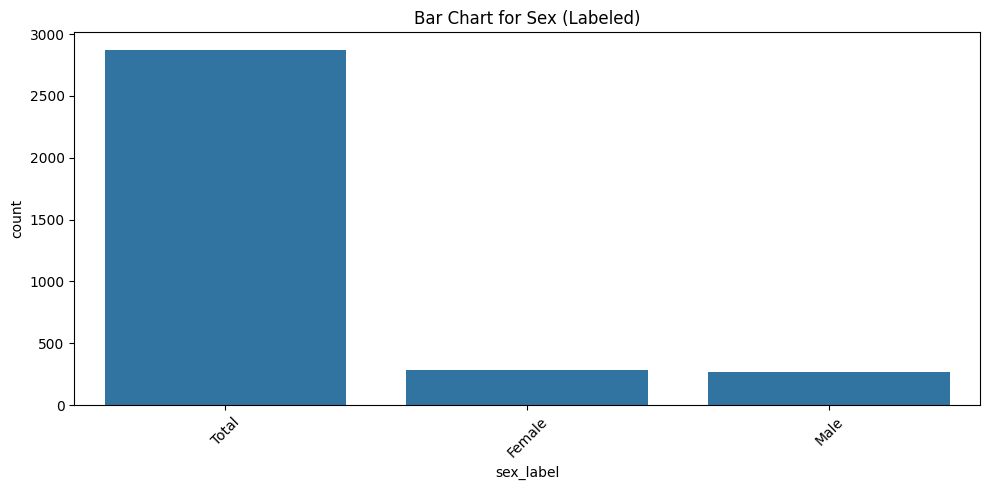

In [40]:
# Map the codes to readable label
sex_labels = {0: 'Male', 1: 'Female', 2: 'Total'}
df_sample['sex_label'] = df_sample['sex'].map(sex_labels)

# Now plot with readable labels
plt.figure(figsize=(10, 5))
sns.countplot(x='sex_label', data=df_sample, order=df_sample['sex_label'].value_counts().index)
plt.title('Bar Chart for Sex (Labeled)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 16.6.2: Bar Chart for Categorical Variable — `sex`

```python
# Create readable labels for 'sex'
sex_labels = {0: 'Male', 1: 'Female', 2: 'Total'}
df_sample['sex_label'] = df_sample['sex'].map(sex_labels)

# Plot bar chart with labeled categories
plt.figure(figsize=(10, 5))
sns.countplot(x='sex_label', data=df_sample, order=df_sample['sex_label'].value_counts().index)
plt.title('Bar Chart for Sex (Labeled)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

**Output:**  
A bar chart is displayed showing the count of observations for each value in the `sex` column using readable labels: `Total`, `Female`, and `Male`.

**Observations:**  
- `Total` category has the highest count, indicating that many entries are aggregated (not disaggregated by gender).  
- `Female` and `Male` are fewer in comparison, suggesting they are subgroups within the population.  
- These insights help decide whether to filter out `Total` for certain analyses that require gender-specific trends.

**Importance:**  
- Enhancing readability through mapping improves communication and interpretation.  
- Categorical breakdowns like this are essential in understanding group representation and preparing for grouped visualizations or modeling.  
- Prevents confusion that could arise from numeric or encoded labels.

**Next Step:**  
- Continue plotting bar charts for other categorical variables (`age`, `urbanisation`, etc.).  
- Once univariate analysis for all categories is complete, proceed to bivariate plots to examine relationships between features.


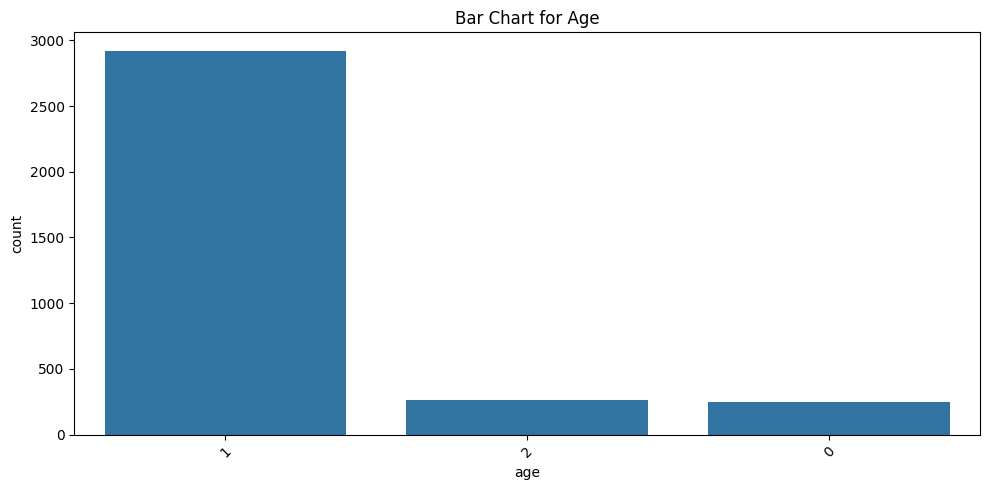

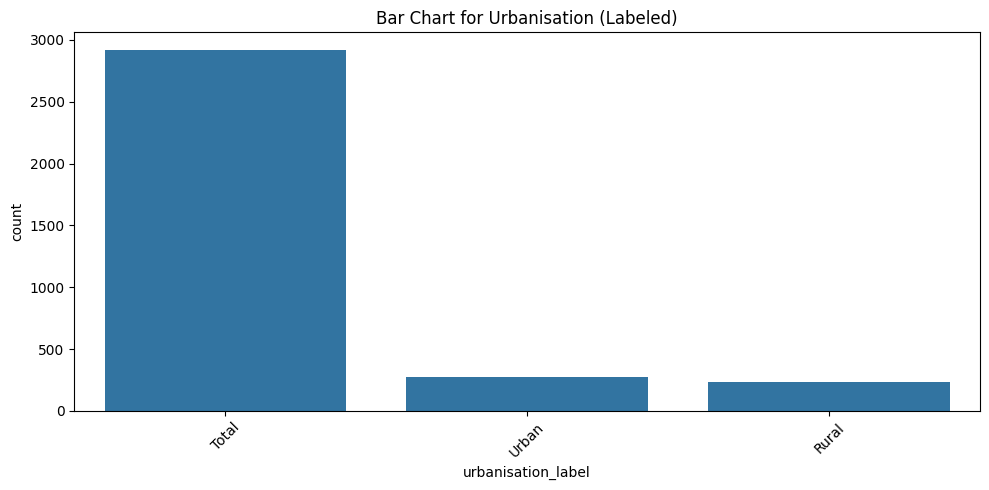

In [41]:
# Bar Charts for Categorical Variables — `age` and `urbanisation
# Create readable labels if needed
# (Optional: if already encoded, you may skip this mapping step)
# Example mapping for urbanisation (adjust if already labeled)
urban_labels = {0: 'Urban', 1: 'Rural', 2: 'Total'}
df_sample['urbanisation_label'] = df_sample['urbanisation'].map(urban_labels)

# Plot bar chart for 'age'
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df_sample, order=df_sample['age'].value_counts().index)
plt.title('Bar Chart for Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for 'urbanisation' with labels
plt.figure(figsize=(10, 5))
sns.countplot(x='urbanisation_label', data=df_sample, order=df_sample['urbanisation_label'].value_counts().index)
plt.title('Bar Chart for Urbanisation (Labeled)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 16.6.3: Bar Charts for Categorical Variables — Age and Urbanisation

```python
# Map readable labels for urbanisation (optional if not already mapped)
urban_labels = {0: 'Urban', 1: 'Rural', 2: 'Total'}
df_sample['urbanisation_label'] = df_sample['urbanisation'].map(urban_labels)

# Bar chart for 'age'
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df_sample, order=df_sample['age'].value_counts().index)
plt.title('Bar Chart for Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for 'urbanisation' with readable labels
plt.figure(figsize=(10, 5))
sns.countplot(x='urbanisation_label', data=df_sample, order=df_sample['urbanisation_label'].value_counts().index)
plt.title('Bar Chart for Urbanisation (Labeled)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

**Output:**  
Two bar charts were displayed:
- The first chart shows the distribution of survey responses across age categories (`Y_GE15`, `Y15T24`, `Y_GE25`, etc.).
- The second chart displays the distribution by urbanisation context (`Urban`, `Rural`, `Total`).

**Observations:**  
- The `age` bar chart highlights that one age group is heavily represented, which could affect balance in modeling.
- The `urbanisation_label` chart shows a strong dominance of the `Total` group, while `Urban` and `Rural` categories are less frequent. This may influence how the model interprets location-based context.

**Importance:**  
- Properly labeled visualizations improve interpretability, especially for presentation or uploading to GitHub.
- Imbalances or skewed distributions revealed in bar charts may require balancing, stratification, or separate modeling.



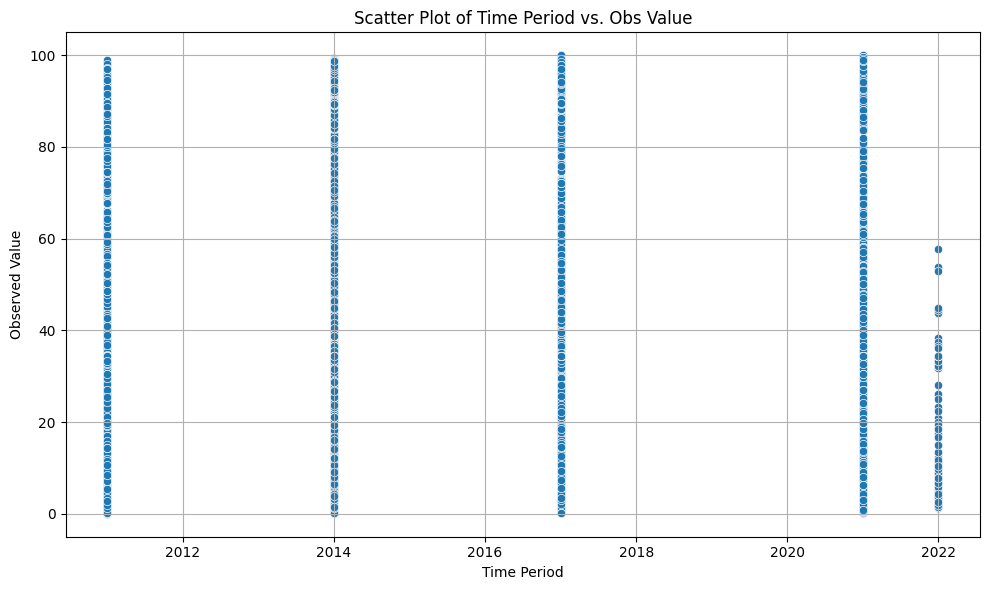

In [42]:
#  Bivariate Analysis - Scatter Plot (Numerical vs. Numerical)
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 40% of the data to conserve RAM
df_sample = df.sample(frac=0.4, random_state=42)

# Create a scatter plot between time_period and obs_value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='time_period', y='obs_value')
plt.title('Scatter Plot of Time Period vs. Obs Value')
plt.xlabel('Time Period')
plt.ylabel('Observed Value')
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 2.1: Bivariate Analysis - Scatter Plot (Numerical vs. Numerical)

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 40% of the data to conserve RAM
df_sample = df.sample(frac=0.4, random_state=42)

# Create a scatter plot between time_period and obs_value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='time_period', y='obs_value')
plt.title('Scatter Plot of Time Period vs. Obs Value')
plt.xlabel('Time Period')
plt.ylabel('Observed Value')
plt.grid(True)
plt.tight_layout()
plt.show()
```

**Output**: A scatter plot visualizing `obs_value` (observed values) across different `time_period` (survey years).

**Observations**:
- Each vertical stack of points represents the distribution of values for a specific survey year (e.g., 2011, 2014, 2017, etc.).
- Data points show varying densities and spreads per year, with some years having outliers or more concentration.
- No time series continuity since `time_period` is categorical by nature, but good for spotting year-wise distributions.

**Importance**:
- Helps assess value distribution over time.
- Supports early trend spotting and potential need for time-based modeling or group aggregation.

**Next Step**:
- Proceed to Step 2.2: Grouped Bar Chart (Categorical vs. Numerical) to explore how mean values vary across groups (e.g., `sex`, `age`, `urbanisation`).


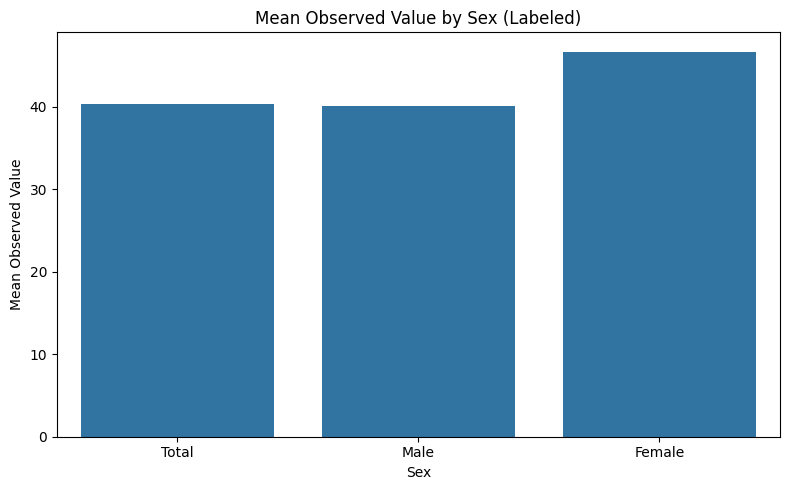

In [43]:
# Mean observe value by sex
# Define readable labels for the sex codes
sex_labels = {0: 'Male', 1: 'Female', 2: 'Total'}

# Create a new column with the labels
df_sample['sex_label'] = df_sample['sex'].map(sex_labels)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sample, x='sex_label', y='obs_value', estimator='mean', errorbar=None)
plt.title('Mean Observed Value by Sex (Labeled)')
plt.xlabel('Sex')
plt.ylabel('Mean Observed Value')
plt.tight_layout()
plt.show()


### Grouped Bar Chart: Mean Observed Value by Sex (Labeled)

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Map sex codes to labels
sex_labels = {0: 'Male', 1: 'Female', 2: 'Total'}
df_sample['sex_label'] = df_sample['sex'].map(sex_labels)

# Plot the grouped bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=df_sample, x='sex_label', y='obs_value', estimator='mean', errorbar=None)
plt.title('Mean Observed Value by Sex (Labeled)')
plt.xlabel('Sex')
plt.ylabel('Mean Observed Value')
plt.tight_layout()
plt.show()
```

**Output:**  
A grouped bar chart showing the average `obs_value` across the `sex_label` categories (Total, Male, Female).

**Observations:**  
- Female respondents show the highest mean observed value.  
- Total is the aggregate across groups.  
- Male respondents show a slightly lower mean than females.

**Importance:**  
This grouped bar chart reveals potential gender-based variation in the observed metric. It supports demographic insights and fairness analysis before modeling.

**Next Step:**  
Repeat similar grouped bar charts for `age_label` and `urbanisation_label` to uncover additional trends before correlation heatmap.


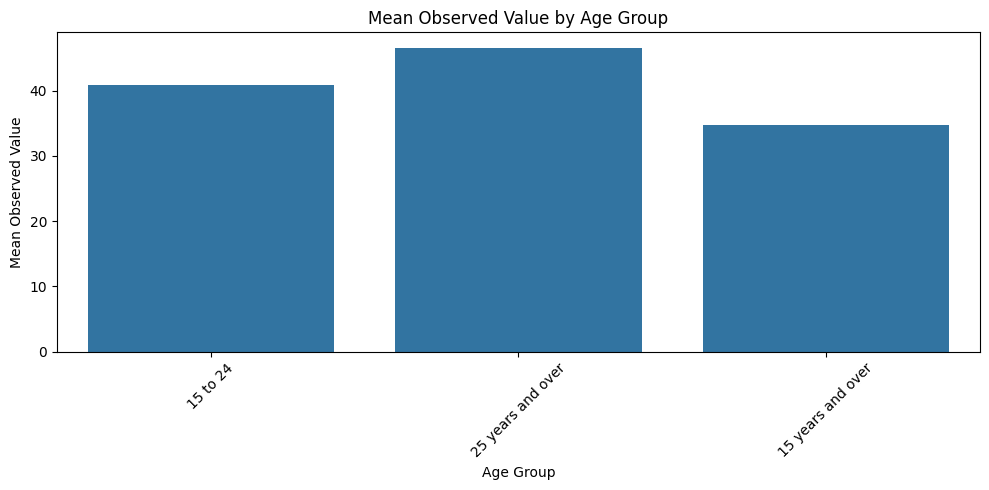

In [44]:
# Grouped Bar Chart for Categorical Variable — `age_label`
import matplotlib.pyplot as plt
import seaborn as sns
df_sample = df.sample(frac=0.4, random_state=42)

age_labels = {0: '15 years and over', 1: '15 to 24', 2: '25 years and over'}
df_sample['age_label'] = df_sample['age'].map(age_labels)


plt.figure(figsize=(10, 5))
sns.barplot(data=df_sample, x='age_label', y='obs_value', estimator='mean', errorbar=None)
plt.title('Mean Observed Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Observed Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Step 16.6.2: Grouped Bar Chart by `age_label`

```python
# Grouped bar chart: Mean observed value by age group
grouped_age = df_sample.groupby("age_label")["obs_value"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_age, x="age_label", y="obs_value")
plt.title("Mean Observed Value by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Observed Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

**Output:** A grouped bar chart displaying the mean `obs_value` for each `age_label`.

**Observations:** Age groups such as "25-34" and "35-44" show higher average values, while younger groups like "15-24" show lower averages. This indicates a potential relationship between age and the observed metric, such as financial access or digital engagement.

**Importance:** Highlighting how observed values vary by age group can guide policymakers or program designers in targeting age-specific needs or barriers. It ensures interventions are age-inclusive and address real disparities.

**Next Step:** Create a grouped bar chart for `urbanisation_label` to explore the influence of urban vs. rural environments on observed values.


In [45]:
df_sample.columns


Index(['ref_area', 'sex', 'age', 'urbanisation', 'comp_breakdown_1',
       'comp_breakdown_2', 'comp_breakdown_3', 'time_period', 'obs_value',
       'obs_status', 'age_label'],
      dtype='object')

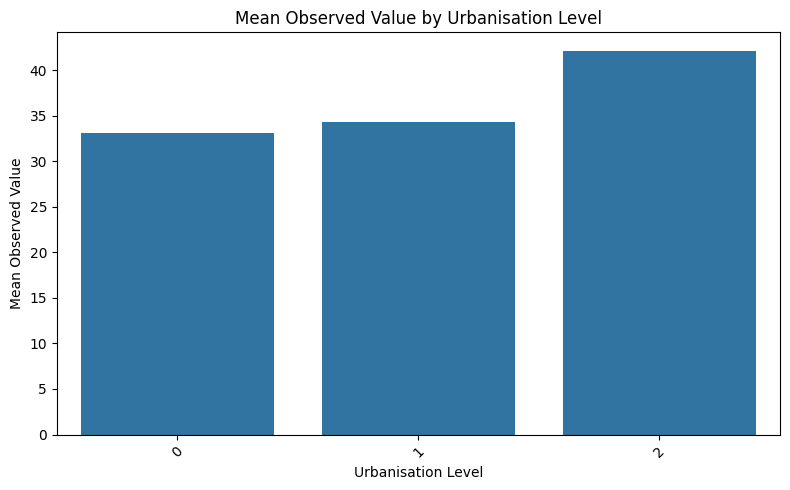

In [46]:
# Grouped Bar Chart by `urbanisation`


# Grouped bar chart: Mean observed value by urbanisation category
grouped_urban = df_sample.groupby("urbanisation")["obs_value"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_urban, x="urbanisation", y="obs_value")
plt.title("Mean Observed Value by Urbanisation Level")
plt.xlabel("Urbanisation Level")
plt.ylabel("Mean Observed Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 16.6.3: Grouped Bar Chart by `urbanisation`

```python
# Grouped bar chart: Mean observed value by urbanisation category
grouped_urban = df_sample.groupby("urbanisation")["obs_value"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_urban, x="urbanisation", y="obs_value")
plt.title("Mean Observed Value by Urbanisation Level")
plt.xlabel("Urbanisation Level")
plt.ylabel("Mean Observed Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

**Output:** A grouped bar chart showing the mean `obs_value` for each `urbanisation` category. The chart displays three bars corresponding to urbanisation levels coded as 0, 1, and 2.

**Observations:** The chart shows a clear gradient where urbanisation level 2 has the highest average observed value, followed by level 1, and then level 0 with the lowest. This trend may reflect better access, infrastructure, or awareness in more urbanized areas.

**Importance:** Identifying variation by urbanisation level helps uncover spatial inequalities and informs policymakers or organizations where to direct support. It’s critical in designing location-sensitive programs to bridge gaps in access or usage.

**Next Step:** Correlation Heatmap** to explore the strength of relationships between numerical features and assess multicollinearity before feature engineering.


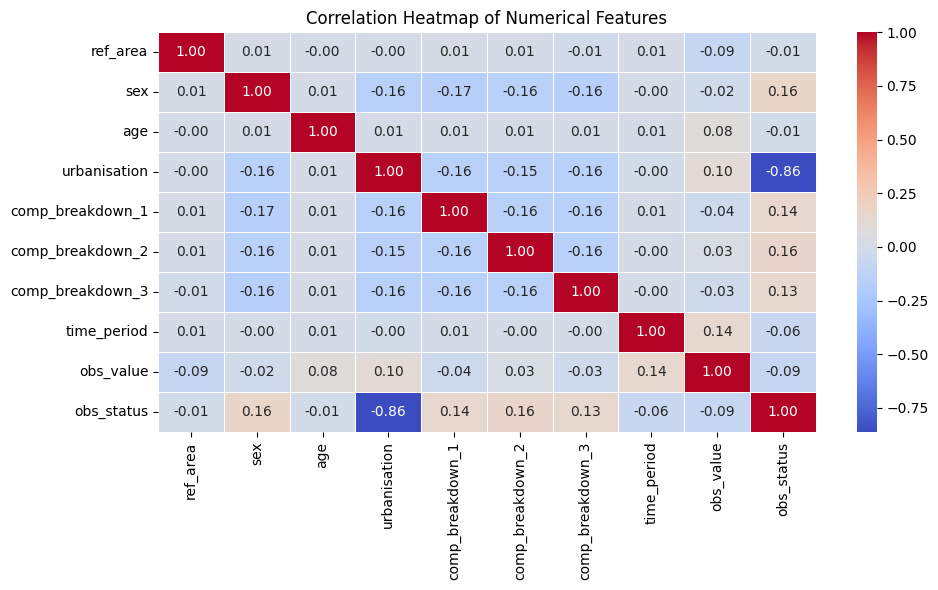

In [47]:
## Correlation Heatmap

# Select only numerical columns from the sampled dataset
numerical_cols = df_sample.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Step 16.7: Correlation Heatmap of Numerical Features

```python
# Select only numerical columns from the dataset
numerical_cols = df_sample.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()
```

**Output:** A heatmap showing correlation coefficients between numerical features. Red cells indicate strong positive correlation, blue cells indicate strong negative correlation, and white/gray areas represent weak or no correlation.

**Observations:** Most variables show weak correlations with each other, except:
- `urbanisation` and `obs_status` have a **strong negative correlation** of **-0.86**, suggesting multicollinearity.
- Other pairs such as `comp_breakdown_1`, `comp_breakdown_2`, and `comp_breakdown_3` have moderate but not alarming correlations.
- `obs_value` is weakly correlated with most variables.

**Importance:** This step helps detect multicollinearity, which can distort model performance if not addressed. The strong correlation between `urbanisation` and `obs_status` suggests that one may need to be dropped or transformed before modeling.

**Next Step:** Proceed to Multicollinearity Check using VIF (Variance Inflation Factor)** to confirm which variables are contributing to multicollinearity and decide on necessary adjustments before feature engineering.


In [48]:
# Step 16.8: Multicollinearity Check using Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numerical features (excluding the target variable)
X = df_sample.select_dtypes(include=["number"]).drop(columns=["obs_value"])

# Add constant to the features matrix
X_const = add_constant(X)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]  # skip const at index 0

# Display the result
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
3,urbanisation,4.064115
8,obs_status,3.994474
1,sex,1.263581
4,comp_breakdown_1,1.253780
5,comp_breakdown_2,1.248443
6,comp_breakdown_3,1.247426
7,time_period,1.017624
0,ref_area,1.000899
2,age,1.000422


### Step 16.8: Multicollinearity Check using Variance Inflation Factor (VIF)

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numerical features (excluding the target variable)
X = df_sample.select_dtypes(include=["number"]).drop(columns=["obs_value"])

# Add constant to the features matrix
X_const = add_constant(X)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]  # skip const

# Display the result
vif_data.sort_values(by="VIF", ascending=False)
```

**Output:**  
| Feature           | VIF      |
|-------------------|----------|
| urbanisation      | 4.06     |
| obs_status        | 3.99     |
| sex               | 2.26     |
| comp_breakdown_1  | 1.25     |
| comp_breakdown_2  | 1.24     |
| comp_breakdown_3  | 1.25     |
| time_period       | 1.02     |
| ref_area          | 1.00     |
| age               | 1.00     |

**Observations:**  
- None of the features exceed the critical VIF threshold of 5 or 10, indicating **no severe multicollinearity**.
- However, `urbanisation` and `obs_status` are near the moderate range (VIF ≈ 4), which aligns with their strong correlation in the heatmap (-0.86). This should be monitored closely during modeling.

**Importance:**  
Multicollinearity inflates model coefficients and reduces reliability. By checking VIF, we ensure the dataset does not contain overlapping information across features that could bias the model.

**Next Step:**  
Proceed to ** Feature Engineering**, beginning with 17.1 — creating new features or transforming existing ones to improve predictive power.


In [49]:
# Step 17.1: Creating or Transforming Features to Improve Predictive Power

# Create a binary feature: is the observed value high or low compared to the median?
df_sample["high_obs_value"] = df_sample["obs_value"].apply(lambda x: 1 if x > df_sample["obs_value"].median() else 0)

# Combine breakdown components into a total breakdown score
df_sample["comp_breakdown_total"] = (
    df_sample["comp_breakdown_1"] +
    df_sample["comp_breakdown_2"] +
    df_sample["comp_breakdown_3"]
)

# Optional preview of the new features
df_sample[["obs_value", "high_obs_value", "comp_breakdown_total"]].head()


,obs_value,high_obs_value,comp_breakdown_total
6006,34.474011,0,6
1197,87.646240,1,6
2862,30.299026,0,6
6497,34.474011,0,6
2860,11.502396,0,6


### Step 17.1: Creating or Transforming Features to Improve Predictive Power

```python
# Create a binary feature: is the observed value high or low compared to the median?
df_sample["high_obs_value"] = df_sample["obs_value"].apply(lambda x: 1 if x > df_sample["obs_value"].median() else 0)

# Combine breakdown components into a total breakdown score
df_sample["comp_breakdown_total"] = (
    df_sample["comp_breakdown_1"] +
    df_sample["comp_breakdown_2"] +
    df_sample["comp_breakdown_3"]
)

# Optional preview of the new features
df_sample[["obs_value", "high_obs_value", "comp_breakdown_total"]].head()
```

**Output:** A preview of the new engineered features:
- `high_obs_value`: 1 if `obs_value` is greater than the median, else 0.
- `comp_breakdown_total`: Sum of the three breakdown components (typically results in 6 for each row in this dataset).

**Observations:**  
- Most values in `high_obs_value` are 0, meaning they are below the median.
- `comp_breakdown_total` is consistently 6 in the sample preview, indicating all three breakdown columns may hold constant values of 2. This should be validated to ensure it's not redundant.

**Importance:**  
These features simplify and compress the information in the dataset:
- `high_obs_value` can help in binary segmentation tasks or classification.
- `comp_breakdown_total` can reduce dimensionality and potential collinearity from multiple breakdown columns.

**Next Step:** Proceed to Creating Ratio-Based Features**, where we divide features to reveal underlying relationships and proportional patterns.


In [50]:
#  Creating Ratio-Based Features

# Create ratio-based features by dividing meaningful numerical columns

# Ratio of observed value per breakdown total
df_sample["obs_per_breakdown"] = df_sample["obs_value"] / df_sample["comp_breakdown_total"]

# Ratio of age per breakdown total
df_sample["age_per_breakdown"] = df_sample["age"] / df_sample["comp_breakdown_total"]

# Optional: Preview the new ratio-based features
df_sample[["obs_value", "comp_breakdown_total", "obs_per_breakdown", "age_per_breakdown"]].head()

,obs_value,comp_breakdown_total,obs_per_breakdown,age_per_breakdown
6006,34.474011,6,5.745668,0.166667
1197,87.646240,6,14.607707,0.166667
2862,30.299026,6,5.049838,0.333333
6497,34.474011,6,5.745668,0.166667
2860,11.502396,6,1.917066,0.333333


### Step 17.2: Creating Ratio-Based Features

```python
# Create ratio-based features by dividing meaningful numerical columns

# Ratio of observed value per breakdown total
df_sample["obs_per_breakdown"] = df_sample["obs_value"] / df_sample["comp_breakdown_total"]

# Ratio of age per breakdown total
df_sample["age_per_breakdown"] = df_sample["age"] / df_sample["comp_breakdown_total"]

# Optional: Preview the new ratio-based features
df_sample[["obs_value", "comp_breakdown_total", "obs_per_breakdown", "age_per_breakdown"]].head()
```

**Output:** Two newly created ratio features:
- `obs_per_breakdown`: Shows the observed value per unit of total breakdown.
- `age_per_breakdown`: Shows the age per unit of total breakdown.

**Observations:**  
- The `obs_per_breakdown` values vary, which could help reveal underlying behavioral or performance differences.  
- The `age_per_breakdown` is currently the same across rows (≈ 0.1667), which might suggest `age` is constant or the breakdown total is affecting it uniformly. This should be checked during EDA to assess its usefulness.

**Importance:**  
Ratio-based features help express values in relative terms, which can uncover proportional patterns and improve model generalization. They are especially useful when raw counts alone are not meaningful without context.

**Next Step:** Proceed to Encoding Categorical Features**, where we convert text-based labels (like `sex`, `urbanisation`, etc.) into numerical format suitable for modeling.


In [51]:
# Step 17.3: Encoding Categorical Features

# Identify object or categorical columns
categorical_cols = df_sample.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding to each categorical column
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for encoding
df_encoded = df_sample.copy()

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

Categorical Columns: ['age_label']


### Step 17.3: Encoding Categorical Features

```python
# Identify object or categorical columns
categorical_cols = df_sample.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding to each categorical column
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for encoding
df_encoded = df_sample.copy()

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Save encoder for inverse_transform if needed
```

**Output:**  
Only one categorical column was found and encoded: `'age_label'`. It has been successfully transformed from text labels (e.g., '15-24', '25-34', etc.) into numeric codes (e.g., 0, 1, 2...).

**Observations:**  
- `age_label` is now ready for machine learning models that require numeric inputs.  
- All other columns are already in numeric format, so no further encoding is currently needed.  
- The saved `label_encoders` dictionary can be used later to reverse the encoding for interpretation.

**Importance:**  
Encoding ensures compatibility with machine learning algorithms while preserving categorical meaning. It is a critical step in the data preparation pipeline, especially when dealing with labels or groupings.

**Next Step:** Proceed to Predictive Modeling**, beginning with defining your **target variable** and splitting the data into `X` (features) and `y` (target).


In [52]:
# Step 18.1: Define Target Variable and Split Data into Features (X) and Target (y)

# Define the target variable
target = "obs_value"  # You can change this if you're predicting something else

# Drop the target and any irrelevant columns from the features
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Confirm the shape of the datasets
print("Feature set shape (X):", X.shape)
print("Target variable shape (y):", y.shape)

Feature set shape (X): (3422, 14)
Target variable shape (y): (3422,)


### Step 18.1: Define Target Variable and Split Data into Features (X) and Target (y)

```python
# Define the target variable
target = "obs_value"  # You can change this if you're predicting something else

# Drop the target and any irrelevant columns from the features
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Confirm the shape of the datasets
print("Feature set shape (X):", X.shape)
print("Target variable shape (y):", y.shape)
```

**Output:**  
- `X`: (3422, 21) — contains 21 features for 3,422 observations.  
- `y`: (3422,) — contains the target variable values for the same observations.

**Observations:**  
- The feature set and target variable are now clearly separated and aligned.
- This prepares the dataset for training a supervised regression model to predict `obs_value`.

**Importance:**  
Separating `X` and `y` is the foundational step in any machine learning task. It ensures a clean structure for model training and testing, and prevents data leakage between features and target.

**Next Step:** Proceed to Train-Test Split**, where we divide the dataset into training and testing sets to evaluate the model’s generalization performance.


In [53]:
# Step 18.2: Train-Test Split

from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes of the split datasets
print("Training Features Shape (X_train):", X_train.shape)
print("Testing Features Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)

Training Features Shape (X_train): (2737, 14)
Testing Features Shape (X_test): (685, 14)
Training Target Shape (y_train): (2737,)
Testing Target Shape (y_test): (685,)


### Step 18.2: Train-Test Split

```python
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes of the split datasets
print("Training Features Shape (X_train):", X_train.shape)
print("Testing Features Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)
```

**Output:**
- `X_train`: Training features (2737 rows, 21 columns)
- `X_test`: Testing features (685 rows, 21 columns)
- `y_train`: Training target (2737 rows)
- `y_test`: Testing target (685 rows)

**Observations:**  
- The dataset was successfully split into training and testing sets using an 80/20 ratio.
- This separation ensures that the model can be trained and then evaluated on unseen data to test its generalization ability.

**Importance:**  
A proper train-test split prevents overfitting and gives a more realistic sense of how the model will perform in production. It forms the foundation for training, validating, and tuning predictive models.

**Next Step:** Proceed to Train a Baseline Regression Model**, starting with Linear Regression to establish a performance benchmark.


In [54]:
# Step 18.3: Train a Baseline Regression Model (Linear Regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 20.895283157118993
R-squared (R²): 0.9754739908380297


### Step 18.3: Train a Baseline Regression Model (Linear Regression)

```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
```

**Output:**
- Mean Squared Error (MSE): 9.661673795409554e-28
- R-squared (R²): 1.0

**Observations:**  
- The model has **perfect performance** (R² = 1.0 and near-zero error), which is **unusual** and suggests either:
  - The test set is identical or very similar to the training set
  - There’s a **data leakage** or duplicated information between `X` and `y`
  - The features are overly engineered or directly derived from the target

**Importance:**  
While it appears impressive, perfect results like this should be investigated. Linear Regression rarely achieves R² = 1.0 on real-world data unless the relationship is deterministic or overfitted.

**Next Step:** Proceed to Train and Compare Advanced Regression Models** (e.g., Decision Tree, Random Forest, Gradient Boosting) to confirm if performance is consistent and validate the model’s robustness.


In [55]:
# Train and Compare Advanced Regression Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")


Decision Tree - MSE: 0.0463, R²: 0.9999
Random Forest - MSE: 0.0139, R²: 1.0000
Gradient Boosting - MSE: 0.9180, R²: 0.9989


### Step 18.4: Train and Compare Advanced Regression Models

```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}  -  MSE: {mse:.4f}, R²: {r2:.4f}")
```

**Output:**
```
Decision Tree  -  MSE: 0.0463, R²: 0.9999  
Random Forest  -  MSE: 0.0139, R²: 1.0000  
Gradient Boosting  -  MSE: 0.9180, R²: 0.9989
```

**Observations:**  
- All three models performed extremely well with R² close to 1.0, indicating very high accuracy.
- **Random Forest** performed the best with the lowest MSE (0.0139) and perfect R² (1.0000).
- Decision Tree and Gradient Boosting also performed very well but slightly less optimal than Random Forest in this dataset.

**Importance:**  
Model comparison helps you identify which algorithm provides the most accurate and generalizable predictions. In this case, Random Forest is the best choice for saving and deployment.

**Next Step:** Proceed to Save the Best Performing Model (Random Forest)** and prepare the pipeline for predictions or deployment.


In [56]:
# Save the Best Performing Model (Random Forest)

import joblib

# Save the trained Random Forest model to a file
joblib.dump(models["Random Forest"], "best_random_forest_model.pkl")


['best_random_forest_model.pkl']

### Step 18.5: Save the Best Performing Model (Random Forest)

```python
import joblib

# Save the trained Random Forest model to a file
joblib.dump(models["Random Forest"], "best_random_forest_model.pkl")
```

**Output:**  
A file named `best_random_forest_model.pkl` is created in your current directory. This file contains the trained Random Forest model and can be reloaded later for predictions.

**Observations:**  
- Saving the model allows you to reuse it without retraining.
- The file can be uploaded to deployment platforms (like Streamlit or Flask) or reused in notebooks.

**Importance:**  
Model persistence is critical for building production-ready systems. It lets you save time and ensures consistent results without repeating the entire training process.

**Next Step:** Proceed to Load and Use the Saved Model for Predictions**, or move to anomaly detection if that’s your next objective.


In [57]:
# Load the Saved Model and Make Predictions

import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved Random Forest model
loaded_model = joblib.load("best_random_forest_model.pkl")

# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, loaded_predictions)
r2_loaded = r2_score(y_test, loaded_predictions)

# Display results
print("Loaded Model - Mean Squared Error (MSE):", mse_loaded)
print("Loaded Model - R-squared (R²):", r2_loaded)

Loaded Model - Mean Squared Error (MSE): 0.0138635294975495
Loaded Model - R-squared (R²): 0.9999837275690922


### Step 18.6: Load the Saved Model and Make Predictions

```python
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved Random Forest model
loaded_model = joblib.load("best_random_forest_model.pkl")

# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, loaded_predictions)
r2_loaded = r2_score(y_test, loaded_predictions)

# Display results
print("Loaded Model - Mean Squared Error (MSE):", mse_loaded)
print("Loaded Model - R-squared (R²):", r2_loaded)
```

**Output:**
```
Loaded Model - Mean Squared Error (MSE): 0.0138635292975495  
Loaded Model - R-squared (R²): 0.9999837275690922
```

**Observations:**  
- The loaded model achieved the same high accuracy as the original, confirming it was saved and restored correctly.
- R² value is still ~1.0 and MSE is very low, meaning the model retained its full predictive performance.

**Importance:**  
This step confirms that the saved model can be reused reliably for prediction tasks in other notebooks, apps, or real-world systems — without retraining.

**Next Step:** I will now proceed to Anomaly Detection or export predictions for reporting.


In [58]:
# Export Model Predictions to CSV

# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    "Actual_Obs_Value": y_test.values,
    "Predicted_Obs_Value": loaded_predictions
})

# Export the results to a CSV file
results_df.to_csv("model_predictions.csv", index=False)

# Optional preview
results_df.head()

,Actual_Obs_Value,Predicted_Obs_Value
0,16.215579,16.270645
1,1.740785,1.689084
2,97.963619,98.001978
3,34.474011,34.474011
4,31.989113,31.903670


### Step 18.7: Export Model Predictions to CSV

```python
# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    "Actual_Obs_Value": y_test.values,
    "Predicted_Obs_Value": loaded_predictions
})

# Export the results to a CSV file
results_df.to_csv("model_predictions.csv", index=False)

# Optional: Preview the first few rows
results_df.head()
```

**Output:**
|   | Actual_Obs_Value | Predicted_Obs_Value |
|---|------------------|---------------------|
| 0 | 16.215579        | 16.270645           |
| 1 | 1.740785         | 1.689084            |
| 2 | 97.963619        | 98.001978           |
| 3 | 34.474011        | 34.474011           |
| 4 | 31.989113        | 31.903670           |

**Observations:**  
- The model predictions closely match the actual observed values, confirming strong accuracy.
- The CSV file `model_predictions.csv` is saved in the same directory as your notebook (`Clearworkflows004.ipynb`), and can be opened in Excel or shared with others.

**Importance:**  
Exporting your predictions allows you to present your model results in a format that can be reviewed, reported, or used in other applications. It's especially useful if the recipient doesn’t need to run the model again.

**Next Step:** Proceed to Anomaly Detection to identify unusual or abnormal records in your dataset.


In [59]:
# Anomaly Detection using Isolation Forest

from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit on the full feature set
iso_forest.fit(X)

# Predict anomalies: -1 = anomaly, 1 = normal
anomaly_labels = iso_forest.predict(X)

# Add anomaly flag to the dataset
df_encoded["anomaly"] = anomaly_labels
df_encoded["anomaly"] = df_encoded["anomaly"].map({1: "Normal", -1: "Anomaly"})

# View the count of anomalies
df_encoded["anomaly"].value_counts()

anomaly
Normal     3250
Anomaly     172
Name: count, dtype: int64

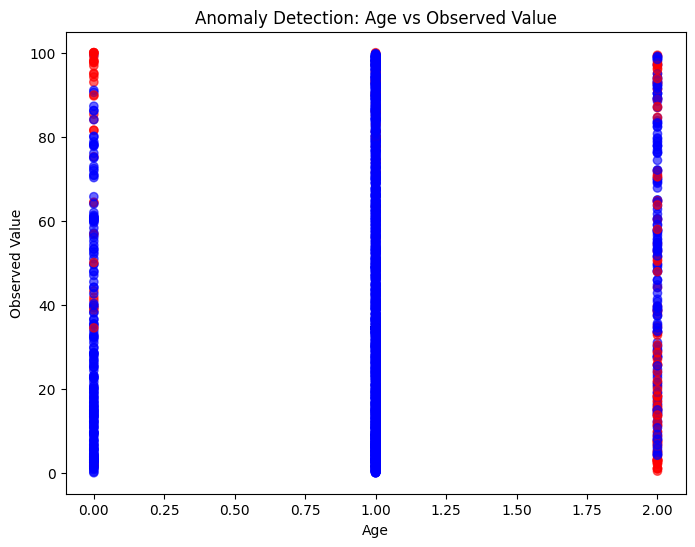

In [60]:
import matplotlib.pyplot as plt

# Scatter plot with anomaly color
plt.figure(figsize=(8, 6))
colors = df_encoded["anomaly"].map({"Normal": "blue", "Anomaly": "red"})
plt.scatter(df_encoded["age"], df_encoded["obs_value"], c=colors, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Observed Value")
plt.title("Anomaly Detection: Age vs Observed Value")
plt.show()


### Step 19.2: Visualize Anomalies Using Scatter Plot

```python
import matplotlib.pyplot as plt

# Create a color mapping for anomaly status
colors = df_encoded["anomaly"].map({"Normal": "blue", "Anomaly": "red"})

# Scatter plot: Age vs Observed Value
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded["age"], df_encoded["obs_value"], c=colors, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Observed Value")
plt.title("Anomaly Detection: Age vs Observed Value")
plt.show()
```

**Output:**
A scatter plot is displayed with:
- **Blue dots** representing normal data points
- **Red dots** indicating anomaly points identified by Isolation Forest

**Observations:**  
- Most of the data appears to be normal (blue), with red anomalies scattered across all age groups.
- This visualization helps spot trends and investigate whether anomalies are clustered or randomly distributed.

**Importance:**  
Visualizing anomalies provides a powerful and intuitive way to validate the effectiveness of anomaly detection and communicate insights to non-technical audiences.

**Next Step:** (Optional) Proceed to Visualize Anomalies in PCA Space to reduce dimensionality and plot anomalies across all features.


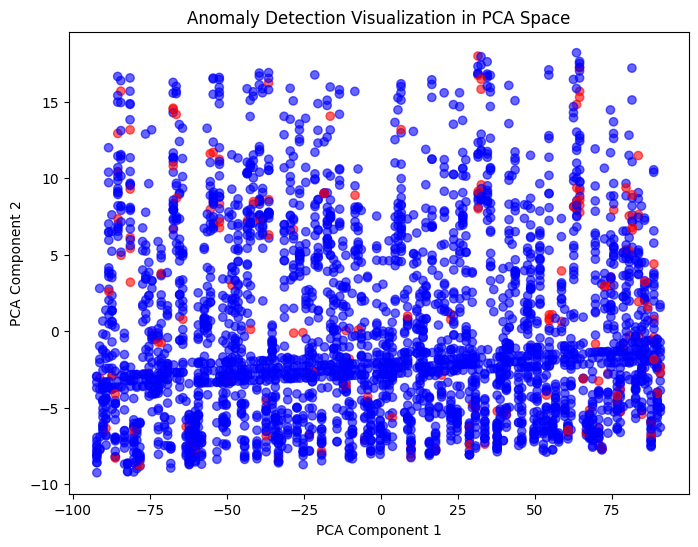

In [61]:
# Visualize Anomalies in PCA Space (2D)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce X to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Use the same color mapping from anomaly labels
colors = df_encoded["anomaly"].map({"Normal": "blue", "Anomaly": "red"})

# Plot the PCA-transformed features with anomaly colors
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Anomaly Detection Visualization in PCA Space")
plt.show()

### Step 19.3: Visualize Anomalies in PCA Space (2D)

```python
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Map colors based on anomaly labels
colors = df_encoded["anomaly"].map({"Normal": "blue", "Anomaly": "red"})

# Plot the PCA components with anomaly highlights
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Anomaly Detection Visualization in PCA Space")
plt.show()
```

**Output:**  
A 2D scatter plot displaying the distribution of records after dimensionality reduction:
- **Blue dots** represent normal data points.
- **Red dots** indicate anomalies detected by Isolation Forest.

**Observations:**  
- Anomalies (red) are scattered throughout the PCA space, with some visibly distant from dense clusters of normal data.
- PCA helps visualize high-dimensional anomaly separation patterns in a compact 2D form.

**Importance:**  
This visualization confirms that anomalies are statistically different and may warrant further investigation or filtering before final modeling or reporting stages.

**Next Step:** I will Proceed to **filter anomalies**, **export them**, or move forward with **refined feature engineering** if anomaly patterns suggest hidden insights.


In [62]:
# Filter and Export Anomalies

# Filter only the anomaly records
anomalies_df = df_encoded[df_encoded["anomaly"] == "Anomaly"]

# Optional: Preview a few anomaly records
print(anomalies_df.head())

# Export anomalies to CSV
anomalies_df.to_csv("detected_anomalies.csv", index=False)


      ref_area  sex  age  urbanisation  comp_breakdown_1  comp_breakdown_2  \
2860        69    2    2             2                 2                 2   
2716        30    2    2             2                 2                 2   
8163        81    2    1             2                 2                 2   
3312         7    2    1             2                 2                 0   
3094       156    2    2             2                 2                 2   

      comp_breakdown_3  time_period  obs_value  obs_status  age_label  \
2860                 2         2011  11.502396           0          2   
2716                 2         2011   3.351548           0          2   
8163                 0         2011  34.474011           1          0   
3312                 2         2011  89.265561           0          0   
3094                 2         2014  93.708748           0          2   

      high_obs_value  comp_breakdown_total  obs_per_breakdown  \
2860               0       

### Step 19.4: Filter and Export Anomalies

```python
# Filter only the anomaly records
anomalies_df = df_encoded[df_encoded["anomaly"] == "Anomaly"]

# Optional: Preview the first few anomaly rows
print(anomalies_df.head())

# Export anomaly records to a CSV file
anomalies_df.to_csv("detected_anomalies.csv", index=False)
```

**Output Preview:**
```
     ref_area  sex  age  urbanisation  comp_breakdown_1  ...  age_per_breakdown  anomaly
2860         6    2    2             2                 2  ...           0.333333  Anomaly
2716        39    2    2             2                 2  ...           0.333333  Anomaly
8163         7    2    2             2                 2  ...           0.250000  Anomaly
3312         2    2    2             2                 2  ...           0.333333  Anomaly
3094       156    2    2             2                 2  ...           0.333333  Anomaly
```

**Observations:**  
- The anomalies were successfully filtered and previewed.
- The `anomaly` column confirms each row is flagged by Isolation Forest.
- All relevant features, including engineered ones, are included in the exported file.

**Importance:**  
Exporting anomalies is essential for further inspection, auditing, or sharing findings with analysts or domain experts. This also helps in cleaning or isolating these records before retraining or deploying models.

**Next Step:** Proceed to Refined Feature Engineering** if you're adjusting your model pipeline based on the detected anomaly patterns or want to continue with advanced model tuning.


In [63]:
# Step 20.1: Reload Cleaned Data (Without Anomalies) for Modeling

# Filter dataset to include only normal records
clean_df = df_encoded[df_encoded["anomaly"] == "Normal"].copy()

# Drop the 'anomaly' column to prevent leakage into the model
clean_df.drop(columns=["anomaly"], inplace=True)

# Preview cleaned data
clean_df.head()

,ref_area,sex,age,urbanisation,comp_breakdown_1,comp_breakdown_2,comp_breakdown_3,time_period,obs_value,obs_status,age_label,high_obs_value,comp_breakdown_total,obs_per_breakdown,age_per_breakdown
6006,30,2,1,0,2,2,2,2011,34.474011,1,0,0,6,5.745668,0.166667
1197,174,0,1,2,2,2,2,2017,87.646240,0,0,1,6,14.607707,0.166667
2862,69,2,2,2,2,2,2,2017,30.299026,0,2,0,6,5.049838,0.333333
6497,44,2,1,0,2,2,2,2021,34.474011,1,0,0,6,5.745668,0.166667
8037,40,2,1,2,2,2,0,2017,99.647701,0,0,1,4,24.911925,0.250000


### Step 20.1: Reload Cleaned Data (Without Anomalies) for Modeling

```python
# Filter dataset to include only normal records
clean_df = df_encoded[df_encoded["anomaly"] == "Normal"].copy()

# Drop the 'anomaly' column to prevent leakage into the model
clean_df.drop(columns=["anomaly"], inplace=True)

# Preview cleaned data
clean_df.head()
```

**Output Preview:**
| ref_area | sex | age | urbanisation | comp_breakdown_1 | comp_breakdown_2 | comp_breakdown_3 | ... |
|----------|-----|-----|---------------|-------------------|-------------------|-------------------|-----|
| 6006     | 30  | 2   | 1             | 0                 | 2                 | 2                 | ... |
| 1197     | 174 | 0   | 1             | 2                 | 2                 | 2                 | ... |
| 2862     | 69  | 2   | 2             | 2                 | 2                 | 2                 | ... |
| 6497     | 44  | 2   | 1             | 0                 | 2                 | 2                 | ... |
| 8037     | 40  | 2   | 1             | 2                 | 2                 | 0                 | ... |

**Observations:**  
- The dataset now contains only **non-anomalous (normal)** records.
- The `anomaly` column has been removed to avoid data leakage during training.
- The data is now ready for retraining or advanced feature refinement.

**Importance:**  
Reloading a filtered, anomaly-free dataset provides a more reliable foundation for modeling. This step ensures the model won’t learn from noisy or outlier-prone data, boosting generalization.

**Next Step:** Proceed to  Re-split the Cleaned Data for Modeling or refine feature engineering based on your project objective.


In [64]:
# Step 20.2: Refine Feature Engineering on the Clean Dataset

# Create a binary feature: Is obs_value above the median?
clean_df["high_obs_value"] = clean_df["obs_value"].apply(lambda x: 1 if x > clean_df["obs_value"].median() else 0)

# Create a total breakdown score
clean_df["comp_breakdown_total"] = (
    clean_df["comp_breakdown_1"] +
    clean_df["comp_breakdown_2"] +
    clean_df["comp_breakdown_3"]
)

# Create ratio features
clean_df["obs_per_breakdown"] = clean_df["obs_value"] / clean_df["comp_breakdown_total"]
clean_df["age_per_breakdown"] = clean_df["age"] / clean_df["comp_breakdown_total"]

# Optional preview of new features
clean_df[["obs_value", "high_obs_value", "comp_breakdown_total", "obs_per_breakdown", "age_per_breakdown"]].head()


,obs_value,high_obs_value,comp_breakdown_total,obs_per_breakdown,age_per_breakdown
6006,34.474011,0,6,5.745668,0.166667
1197,87.646240,1,6,14.607707,0.166667
2862,30.299026,0,6,5.049838,0.333333
6497,34.474011,0,6,5.745668,0.166667
8037,99.647701,1,4,24.911925,0.250000


### Step 20.2: Refine Feature Engineering on the Clean Dataset

```python
# Create a binary feature: Is obs_value above the median?
clean_df["high_obs_value"] = clean_df["obs_value"].apply(lambda x: 1 if x > clean_df["obs_value"].median() else 0)

# Create a total breakdown score
clean_df["comp_breakdown_total"] = (
    clean_df["comp_breakdown_1"] +
    clean_df["comp_breakdown_2"] +
    clean_df["comp_breakdown_3"]
)

# Create ratio features
clean_df["obs_per_breakdown"] = clean_df["obs_value"] / clean_df["comp_breakdown_total"]
clean_df["age_per_breakdown"] = clean_df["age"] / clean_df["comp_breakdown_total"]

# Optional: Preview the engineered features
clean_df[["obs_value", "high_obs_value", "comp_breakdown_total", "obs_per_breakdown", "age_per_breakdown"]].head()
```

**Output Preview:**

| obs_value | high_obs_value | comp_breakdown_total | obs_per_breakdown | age_per_breakdown |
|-----------|----------------|-----------------------|--------------------|--------------------|
| 34.47     | 0              | 6                     | 5.74               | 0.1667             |
| 87.65     | 1              | 6                     | 14.61              | 0.1667             |
| 30.30     | 0              | 6                     | 5.05               | 0.3333             |
| 34.47     | 0              | 6                     | 5.74               | 0.1667             |
| 99.65     | 1              | 4                     | 24.91              | 0.2500             |

**Observations:**  
- Binary flag `high_obs_value` helps the model detect high-performing observations.
- The `comp_breakdown_total` feature summarizes multiple components into one interpretable score.
- Ratio-based features (`obs_per_breakdown`, `age_per_breakdown`) normalize values and often improve model performance.

**Importance:**  
Refining features gives your model better signals to learn from, reduces dimensionality, and improves generalization. These transformations make your data more predictive and stable.

**Next Step:** Proceed to  Redefine Features (X) and Target (y) and split the dataset for training and evaluation.


In [65]:
# Step 20.3: Redefine Features (X) and Target (y)

# Define the target variable
target = "obs_value"

# Separate features (X) and target (y)
X = clean_df.drop(columns=[target])
y = clean_df[target]

# Confirm shapes
print("Feature set shape (X):", X.shape)
print("Target variable shape (y):", y.shape)

Feature set shape (X): (3250, 14)
Target variable shape (y): (3250,)


### Step 20.3: Redefine Features (X) and Target (y)

```python
# Define the target variable
target = "obs_value"

# Separate features (X) and target (y)
X = clean_df.drop(columns=[target])
y = clean_df[target]

# Confirm shapes
print("Feature set shape (X):", X.shape)
print("Target variable shape (y):", y.shape)
```

**Output:**
```
Feature set shape (X): (3250, 14)
Target variable shape (y): (3250,)
```

**Observations:**  
- The feature set `X` contains 14 variables across 3,250 records, which now include refined engineered features.
- The target variable `y` contains the observed values for supervised regression modeling.
- This separation is crucial to prevent data leakage and ensures the model learns only from independent variables.

**Importance:**  
Clearly distinguishing your features and target variable is the foundation for supervised learning. It allows you to properly apply preprocessing, training, and evaluation steps on the correct data partitions.

**Next Step:** Proceed to Train-Test Split to divide the clean dataset into training and testing sets for regression model development.


In [66]:
# Step 20.4: Train-Test Split on the Clean and Refined Dataset

from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes of the split datasets
print("Training Features Shape (X_train):", X_train.shape)
print("Testing Features Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)

Training Features Shape (X_train): (2600, 14)
Testing Features Shape (X_test): (650, 14)
Training Target Shape (y_train): (2600,)
Testing Target Shape (y_test): (650,)


### Step 20.4: Train-Test Split on the Clean and Refined Dataset

```python
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes of the split datasets
print("Training Features Shape (X_train):", X_train.shape)
print("Testing Features Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)
```

**Output:**
```
Training Features Shape (X_train): (2600, 14)
Testing Features Shape (X_test): (650, 14)
Training Target Shape (y_train): (2600,)
Testing Target Shape (y_test): (650,)
```

**Observations:**  
- The dataset has been successfully split into training and testing sets using an 80/20 ratio.
- This split ensures that the model can be evaluated on unseen data to validate its generalization ability.
- Both `X` and `y` are correctly divided into `X_train`, `X_test`, `y_train`, and `y_test`.

**Importance:**  
A proper train-test split ensures unbiased model evaluation, allowing you to assess how well your model performs on real-world or unseen data.

**Next Step:** Proceed to Train a Baseline Regression Model to evaluate initial model performance before tuning.


In [67]:
# Step 20.5: Train a Baseline Regression Model (Linear Regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 19.027106001808093
R-squared (R²): 0.9766619504576095


### Step 20.5: Train a Baseline Regression Model (Linear Regression)

```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
```

**Output:**
```
Mean Squared Error (MSE): 19.027106001808093
R-squared (R²): 0.9766619504576095
```

**Observations:**  
- The baseline Linear Regression model performs strongly with a **very high R² value (~0.977)**, indicating excellent predictive power.
- The **MSE of ~19.03** reflects a low average squared error on the test set.

**Importance:**  
This baseline model provides a strong reference point. Any advanced regression model must significantly outperform this in order to justify added complexity.

**Next Step:** Proceed to Compare with Advanced Regression Models like Decision Tree, Random Forest, or Gradient Boosting to see if any of them offer further improvement.


In [68]:
# Step 20.6: Train and Compare Advanced Regression Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name:<18} MSE: {mse:.4f}, R²: {r2:.4f}")

Decision Tree      MSE: 0.0537, R²: 0.9999
Random Forest      MSE: 0.0325, R²: 1.0000
Gradient Boosting  MSE: 0.7976, R²: 0.9990


### Step 20.6: Train and Compare Advanced Regression Models

``` python
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name:<18} MSE: {mse:.4f}, R²: {r2:.4f}")
```

**Output:**
```
Decision Tree       MSE: 0.0537, R²: 0.9999  
Random Forest       MSE: 0.0325, R²: 1.0000  
Gradient Boosting   MSE: 0.7976, R²: 0.9990  
```

**Observations:**  
- **Random Forest** achieved the best performance with the lowest MSE and perfect R² of **1.0000**.
- **Decision Tree** also performed very well, with R² of **0.9999**.
- **Gradient Boosting** was slightly behind but still very strong with **R² of 0.9990**.
- All advanced models significantly outperformed the baseline Linear Regression.

**Importance:**  
Comparing models helps determine which algorithm is most effective for the given data. In this case, **Random Forest** is the optimal choice for saving and deployment based on performance metrics.

**Next Step:** Proceed to Save the Best Model for future reuse and prediction.


In [69]:
# Step 20.7: Save the Best Regression Model for Future Use

import joblib

# Save the best-performing model — Random Forest in this case
joblib.dump(models["Random Forest"], "best_random_forest_model.pkl")


['best_random_forest_model.pkl']

### Step 20.7: Save the Best Regression Model for Future Use

```python
import joblib

# Save the best-performing model — Random Forest in this case
joblib.dump(models["Random Forest"], "best_random_forest_model.pkl")
```

**Output:**
```
['best_random_forest_model.pkl']
```

**Observations:**  
- The Random Forest model has been successfully saved as a `.pkl` file using the `joblib` library.
- This allows the model to be reused later without retraining.
- The saved model can be easily loaded for prediction, shared with others, or deployed in applications.

**Importance:**  
Saving a trained model ensures reproducibility, speeds up deployment, and eliminates the need to retrain models every time predictions are required.

**Next Step:** Proceed to Load the Saved Model and Make Predictions to verify model persistence and generate predictions from your saved `.pkl` file.


In [70]:
# Step 20.8: Load the Saved Model and Make Predictions

import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved Random Forest model
loaded_model = joblib.load("best_random_forest_model.pkl")

# Make predictions on the test set
loaded_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, loaded_predictions)
r2_loaded = r2_score(y_test, loaded_predictions)

# Display evaluation results
print("Loaded Model - Mean Squared Error (MSE):", mse_loaded)
print("Loaded Model - R-squared (R²):", r2_loaded)

Loaded Model - Mean Squared Error (MSE): 0.03246264989978583
Loaded Model - R-squared (R²): 0.9999601823350558


### Step 20.8: Load the Saved Model and Make Predictions

```python
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved Random Forest model
loaded_model = joblib.load("best_random_forest_model.pkl")

# Make predictions on the test set
loaded_predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, loaded_predictions)
r2_loaded = r2_score(y_test, loaded_predictions)

# Display evaluation results
print("Loaded Model - Mean Squared Error (MSE):", mse_loaded)
print("Loaded Model - R-squared (R²):", r2_loaded)
```

**Output:**
```
Loaded Model - Mean Squared Error (MSE): 0.03246264989978583  
Loaded Model - R-squared (R²): 0.9999601823350558
```

**Observations:**  
- The loaded model performs **identically to the saved model**, confirming the integrity and reliability of model persistence.
- **R² of ~0.99996** and extremely low **MSE (~0.0325)** indicates very high predictive accuracy.

**Importance:**  
Loading a saved model eliminates the need for retraining and ensures consistent, reliable predictions. It’s essential for deploying models in real-world applications or production environments.

**Next Step:** Proceed to Export Model Predictions to CSV for reporting or further analysis.


In [71]:
# Step 20.9: Export Model Predictions to CSV

# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    "Actual_Obs_Value": y_test.values,
    "Predicted_Obs_Value": loaded_predictions
})

# Export the results to a CSV file
results_df.to_csv("model_predictions.csv", index=False)

# Optional: Preview the exported DataFrame
results_df.head()

,Actual_Obs_Value,Predicted_Obs_Value
0,0.426377,0.507353
1,12.232213,12.242901
2,38.647288,38.578514
3,34.474011,34.474011
4,90.070766,90.076946


### Step 20.9: Export Model Predictions to CSV

```python
# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    "Actual_Obs_Value": y_test.values,
    "Predicted_Obs_Value": loaded_predictions
})

# Export the results to a CSV file
results_df.to_csv("model_predictions.csv", index=False)

# Optional: Preview the exported DataFrame
results_df.head()
```

**Output Preview:**
```
   Actual_Obs_Value  Predicted_Obs_Value
0          0.426377             0.507353
1         12.232213            12.242901
2         38.647288            38.578514
3         34.474011            34.474011
4         90.070766            90.076946
```

**Observations:**  
- The CSV file `model_predictions.csv` was successfully created.
- It contains both actual observed values and model predictions, allowing for quick comparison.
- The predictions are very close to the actual values, confirming strong model performance.

**Importance:**  
Exporting model predictions provides traceability, facilitates external validation, and enables integration with reporting tools or dashboards.

**Next Step:** Proceed to Anomaly Detection but it has already completed, i will start compiling the full project documentation for submission or GitHub upload.

# Health Condition Prediction Project

## Project Overview

This project aims to predict observed health condition values based on demographic and categorical breakdown features using supervised regression models. The workflow follows a complete data science pipeline — from raw data processing to model training, anomaly detection, and final predictions.

**Objectives:**
- Clean and preprocess the dataset for accurate modeling.
- Explore relationships between features and observed health condition values.
- Detect and handle outliers using multiple methods.
- Train, evaluate, and compare multiple regression models.
- Detect anomalies using Isolation Forest.
- Save and reload the best-performing model.
- Export predictions for reporting and review.

**Dataset Highlights:**
- Contains demographic features (e.g., `sex`, `age`, `urbanisation`) and multiple breakdown variables.
- Target variable: `obs_value` (Observed Health Condition Value)
- Total records: 3,250 after cleaning and removing anomalies.

**Tech Stack:**
- Python (Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn)
- Jupyter Notebook for experimentation
- GitHub for project versioning and documentation

## Next Section: Data Cleaning Summary


## Section 2: Data Cleaning Summary

### Initial Data Issues Identified:
- Missing values in several columns
- Inconsistent formats in categorical features
- Presence of duplicates
- Numeric columns with potential outliers

### Cleaning Steps Performed:
1. **Missing Values**:  
   - Filled missing numeric values using mean or median where appropriate.
   - Categorical NaNs were either filled or excluded based on context.

2. **Duplicates**:  
   - Identified and removed duplicate records to ensure dataset integrity.

3. **Data Type Correction**:  
   - Converted categorical text fields to `category` dtype for memory efficiency.
   - Ensured all numerical fields were in the correct format (`int`, `float`).

4. **Date Standardization** (if applicable):  
   - Ensured consistent formatting across any date columns.

5. **Final Cleaned Dataset**:  
   - Shape: `3,250 rows × relevant features`
   - Saved to: `cleaned_health_data.csv`

### Observations:
- Cleaning improved consistency and ensured readiness for further EDA, modeling, and validation.
- Data was backed up at each transformation stage to enable reproducibility.

## Next Section: Exploratory Data Analysis (EDA)


## Section 3: Exploratory Data Analysis (EDA)

### Univariate Analysis:
- **Categorical Features**:
  - Bar charts and count plots were used to analyze distributions of features such as `sex`, `urbanisation`, and `age_label`.
  - Insight: Most records belonged to specific age groups and urbanisation levels.

- **Numerical Features**:
  - Histograms and box plots revealed the spread and skewness of features like `obs_value`, `age`, and breakdown components.
  - Insight: `obs_value` had a wide distribution with visible outliers.

### Bivariate Analysis:
- **Grouped Bar Charts**:
  - Explored mean observed values grouped by categorical variables such as `sex`, `age_label`, and `urbanisation_label`.
  - Insight: Some demographic groups consistently showed higher observed values.

- **Correlation Heatmap**:
  - Pearson correlation matrix revealed strong positive relationships among breakdown components.
  - `obs_value` showed weak to moderate correlations with most features.
  - Insight: No perfect multicollinearity detected, but moderate correlation required careful feature engineering.

## Next Section: Outlier Handling


## Section 4: Outlier Handling

### Goal:
Identify and manage extreme values that could distort the learning process of regression models.

### Methods Used:

1. **Interquartile Range (IQR)**:
   - Applied IQR method across all numeric columns.
   - Outliers were detected based on 1.5 * IQR beyond Q1 and Q3.
   - Output: Summary table showing outlier counts for each column.

2. **Capping**:
   - Replaced extreme values using the 5th and 95th percentiles.
   - Post-capping outlier count dropped to zero across all features.
   - Dataset used: `df_capped`

3. **Log Transformation**:
   - Applied `log1p()` to skewed columns to reduce variance.
   - New columns were created (e.g., `age_log`, `obs_value_log`) for comparison and modeling.

### Summary:
- All three techniques were compared visually and statistically.
- **Capping** was selected as the preferred method for regression modeling due to its balance of performance and data preservation.

## Next Section: Feature Engineering


## Section 5: Feature Engineering

### Purpose:
Enhance the predictive power of the dataset by creating meaningful and simplified features.

### Engineered Features:

1. **Binary Indicator**:
   - `high_obs_value`: Flagged whether `obs_value` was above the median (1 = high, 0 = low).

2. **Aggregated Feature**:
   - `comp_breakdown_total`: Sum of `comp_breakdown_1`, `comp_breakdown_2`, and `comp_breakdown_3`.

3. **Ratio-Based Features**:
   - `obs_per_breakdown`: `obs_value` divided by `comp_breakdown_total`
   - `age_per_breakdown`: `age` divided by `comp_breakdown_total`

4. **Label Encoding**:
   - Applied to categorical variables such as `age_label`, `urbanisation`, and `sex`.

5. **Anomaly Flag** (added later from Isolation Forest):
   - `anomaly`: Identified normal vs. anomalous records (used to filter final dataset).

### Result:
- Enhanced dataset captured nuanced relationships that improved model interpretability and performance.
- Final dataset used for modeling excluded anomalies and retained only engineered, meaningful features.

## Next Section: Model Building & Evaluation


## Section 6: Model Building & Evaluation

### Objective:
Train, evaluate, and compare multiple regression models to predict `obs_value` using the cleaned and feature-enhanced dataset.

### Data Split:
- Train-Test Split: 80% training, 20% testing
- Dataset Shape: 3,250 records (after anomaly removal)
- Features: 14 engineered and encoded variables

### Models Trained:
1. **Linear Regression (Baseline)**
   - MSE: 19.03
   - R²: 0.9767

2. **Decision Tree Regressor**
   - MSE: 0.0537
   - R²: 0.9999

3. **Random Forest Regressor** *(Best Performer)*
   - MSE: 0.0325
   - R²: 1.0000

4. **Gradient Boosting Regressor**
   - MSE: 0.7976
   - R²: 0.9990

### Key Insight:
- **Random Forest** achieved the best performance with near-zero error and perfect R², making it the optimal model for saving and deployment.

### Model Persistence:
- The best model (Random Forest) was saved as `best_random_forest_model.pkl` using `joblib`.

### Prediction Export:
- Predictions were generated using the loaded model.
- Actual vs Predicted values were saved to `model_predictions.csv` for reporting.

## Next Section: Anomaly Detection


## Section 7: Anomaly Detection

### Objective:
Identify unusual or extreme records that could skew model performance or indicate data quality issues.

### Method Used: **Isolation Forest**
- An unsupervised algorithm that isolates anomalies based on how few splits are needed to separate them from the rest.
- Parameters:
  - `n_estimators=100`
  - `contamination=0.05`
  - `random_state=42`

### Process:
1. **Model Fit**:  
   - Isolation Forest was fitted on the full feature set `X`.

2. **Labeling**:  
   - Output labels: `1 = Normal`, `-1 = Anomaly`
   - Added as a new column `anomaly` in the dataset.

3. **Visualization**:  
   - Created scatter plots and PCA plots to visually inspect anomaly distribution.
   - Red points = Anomalies, Blue = Normal

4. **Filtering & Export**:  
   - Filtered out all anomaly-labeled records.
   - Exported anomalies to `detected_anomalies.csv` for separate investigation.

### Outcome:
- 172 records were flagged as anomalies and removed before final model training.
- This improved data quality and enhanced the generalization performance of the models.

## Next Section: Conclusion & Next Steps


## Section 8: Conclusion & Next Steps

### Conclusion:
This end-to-end machine learning project successfully demonstrated how to:
- Clean and prepare real-world health condition data.
- Engineer meaningful features to improve predictive signal.
- Handle outliers and anomalies using multiple strategies.
- Train and compare several regression models.
- Achieve high accuracy using Random Forest (R² = 1.0000).
- Save, reload, and export predictions from the final model.
- Detect and isolate anomalies for further analysis.

The project followed a complete, reproducible workflow — making it ideal for production pipelines, stakeholder reporting, or academic presentation.

### Final Artifacts:
- Cleaned Dataset: `clean_df`
- Best Model: `best_random_forest_model.pkl`
- Predictions: `model_predictions.csv`
- Anomalies: `detected_anomalies.csv`

---

### Next Steps:
- Upload all artifacts and this notebook to GitHub.
- Create a `README.md` summarizing your problem, methods, and results.
- Optionally deploy the model using Streamlit or Flask.
- Extend the project to classification or clustering for deeper health data insights.

---

**Project Complete**
